In [3]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'CatBoost-FS-767cases-1921-2023.ipynb', 'catboost_info', 'EGFR_subtypes_prediction_134cases_1921_newKNN19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newKNN191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR19.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newLR191.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB17.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newNB171.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF11.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF111.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-25.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-251-shap.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newRF2-251.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK18.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSTACK181.ipynb', 'EGFR_subtypes_prediction_134cases_1921_newSVM1

In [4]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [5]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'SVM22'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-SVM22.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-SVM22.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [6]:
test.shape

(29, 23)

In [7]:
train.shape

(104, 23)

In [8]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [10]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/trainZscore-SVM22.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_wavelet-LLH_glcm_Correlation                       104 non-null    float64
 1   CT_wavelet2-LHH_firstorder_Mean                       104 non-null    float64
 2   CT_wavelet2-HLL_firstorder_Mean                       104 non-null    float64
 3   CT_original_glcm_Imc1                                 104 non-null    float64
 4   CT_wavelet-LLH_glcm_DifferenceVariance                104 non-null    float64
 5   CT_original_shape_Sphericity                          104 non-null    float64
 6   CT_wavelet-HLH_firstorder_Median                      104 non-null    float64
 7   CT_wavelet-HLH_glcm_Imc1                              104 non-null    float64
 8   CT_wavelet-LHH_glcm_ClusterShade                      104 no

count   mean   std  \
CT_wavelet-LLH_glcm_Correlation                    104.000 -0.000 1.005   
CT_wavelet2-LHH_firstorder_Mean                    104.000  0.000 1.005   
CT_wavelet2-HLL_firstorder_Mean                    104.000 -0.000 1.005   
CT_original_glcm_Imc1                              104.000 -0.000 1.005   
CT_wavelet-LLH_glcm_DifferenceVariance             104.000  0.000 1.005   
CT_original_shape_Sphericity                       104.000  0.000 1.005   
CT_wavelet-HLH_firstorder_Median                   104.000  0.000 1.005   
CT_wavelet-HLH_glcm_Imc1                           104.000 -0.000 1.005   
CT_wavelet-LHH_glcm_ClusterShade                   104.000 -0.000 1.005   
CT_wavelet-HHH_firstorder_Skewness                 104.000 -0.000 1.005   
CT_original_shape_SurfaceVolumeRatio               104.000 -0.000 1.005   
CT_wavelet-HHL_glcm_Correlation                    104.000  0.000 1.005   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... 104.000 -0.000 1.005   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... 104.000 -0.000 1.005   
CT_lbp-3D-m1_firstorder_90Percentile               104.000 -0.000 1.005   
CT_wavelet-HLH_firstorder_Maximum                  104.000 -0.000 1.005   
CT_wavelet2-LLL_glcm_Correlation                   104.000 -0.000 1.005   
CT_lbp-3D-m1_firstorder_10Percentile               104.000  0.000 1.005   
CT_original_firstorder_90Percentile                104.000  0.000 1.005   
CT_wavelet2-LHH_glcm_ClusterShade                  104.000  0.000 1.005   
CT_wavelet2-LHL_firstorder_Median                  104.000  0.000 1.005   
CT_lbp-3D-k_glcm_ClusterShade                      104.000  0.000 1.005   
label                                              104.000  0.490 0.502   

                                                      min    10%    25%  \
CT_wavelet-LLH_glcm_Correlation                    -5.563 -0.835 -0.365   
CT_wavelet2-LHH_firstorder_Mean                    -2.348 -1.135 -0.412   
CT_wavelet2-HLL_firstorder_Mean                    -6.803 -0.768 -0.356   
CT_original_glcm_Imc1                              -2.589 -1.472 -0.561   
CT_wavelet-LLH_glcm_DifferenceVariance             -0.786 -0.690 -0.599   
CT_original_shape_Sphericity                       -2.389 -1.402 -0.814   
CT_wavelet-HLH_firstorder_Median                   -6.896 -0.442 -0.055   
CT_wavelet-HLH_glcm_Imc1                           -3.527 -1.309 -0.564   
CT_wavelet-LHH_glcm_ClusterShade                   -2.986 -0.674 -0.092   
CT_wavelet-HHH_firstorder_Skewness                 -1.621 -0.403 -0.183   
CT_original_shape_SurfaceVolumeRatio               -1.543 -1.236 -0.873   
CT_wavelet-HHL_glcm_Correlation                    -3.633 -0.923 -0.505   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... -1.584 -1.240 -0.945   
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNorma... -2.088 -1.291 -0.894   
CT_lbp-3D-m1_firstorder_90Percentile               -2.484 -1.500 -0.516   
CT_wavelet-HLH_firstorder_Maximum                  -1.228 -1.058 -0.823   
CT_wavelet2-LLL_glcm_Correlation                   -5.994 -0.718 -0.167   
CT_lbp-3D-m1_firstorder_10Percentile               -1.902 -1.243 -0.585   
CT_original_firstorder_90Percentile                -5.552 -0.761  0.094   
CT_wavelet2-LHH_glcm_ClusterShade                  -5.247 -0.586 -0.168   
CT_wavelet2-LHL_firstorder_Median                  -3.218 -0.744 -0.382   
CT_lbp-3D-k_glcm_ClusterShade                      -3.619 -1.479 -0.111   
label                                               0.000  0.000  0.000   

                                                      50%   75%   90%   95%  \
CT_wavelet-LLH_glcm_Correlation                     0.218 0.579 0.815 0.953   
CT_wavelet2-LHH_firstorder_Mean                    -0.019 0.244 0.528 1.177   
CT_wavelet2-HLL_firstorder_Mean                     0.039 0.314 0.861 1.322   
CT_original_glcm_Imc1                               0.144 0.700 1.279 1.446   
CT_wavelet-LLH_glcm_DifferenceVariance             -0.43

In [11]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LLH_glcm_Correlation                         0
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized    0
CT_lbp-3D-k_glcm_ClusterShade                           0
CT_wavelet2-LHL_firstorder_Median                       0
CT_wavelet2-LHH_glcm_ClusterShade                       0
CT_original_firstorder_90Percentile                     0
CT_lbp-3D-m1_firstorder_10Percentile                    0
CT_wavelet2-LLL_glcm_Correlation                        0
CT_wavelet-HLH_firstorder_Maximum                       0
CT_lbp-3D-m1_firstorder_90Percentile                    0
CT_wavelet-LHH_glszm_SizeZoneNonUniformityNormalized    0
CT_wavelet-HHL_glcm_Correlation                         0
CT_wavelet2-LHH_firstorder_Mean                         0
CT_original_shape_SurfaceVolumeRatio                    0
CT_wavelet-HHH_firstorder_Skewness                      0
CT_wavelet-LHH_glcm_ClusterShade                        0
CT_wavelet-HLH_glcm_Imc1                                0
CT_wavelet-HLH

In [25]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.627273
Naive Bayes: 0.713636
KNN: 0.622727
SVM: 0.768182
ANN: 0.627273
CART: 0.772727
BaggedTrees: 0.681818
RF: 0.631818
AdaBoost: 0.718182
GBM: 0.677273
XGBoost: 0.727273
LightGBM: 0.727273
CatBoost: 0.668182
NGBoost: 0.672727

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.686          0.627
1          Naive Bayes           0.722          0.714
2                  KNN           0.699          0.623
3                  SVM           0.819          0.768
4                  ANN           1.000          0.627
5                 CART           1.000          0.773
6          BaggedTrees           0.988          0.682
7                   RF           1.000          0.632
8             AdaBoost           1.000          0.718
9                  GBM           1.000          0.677
10

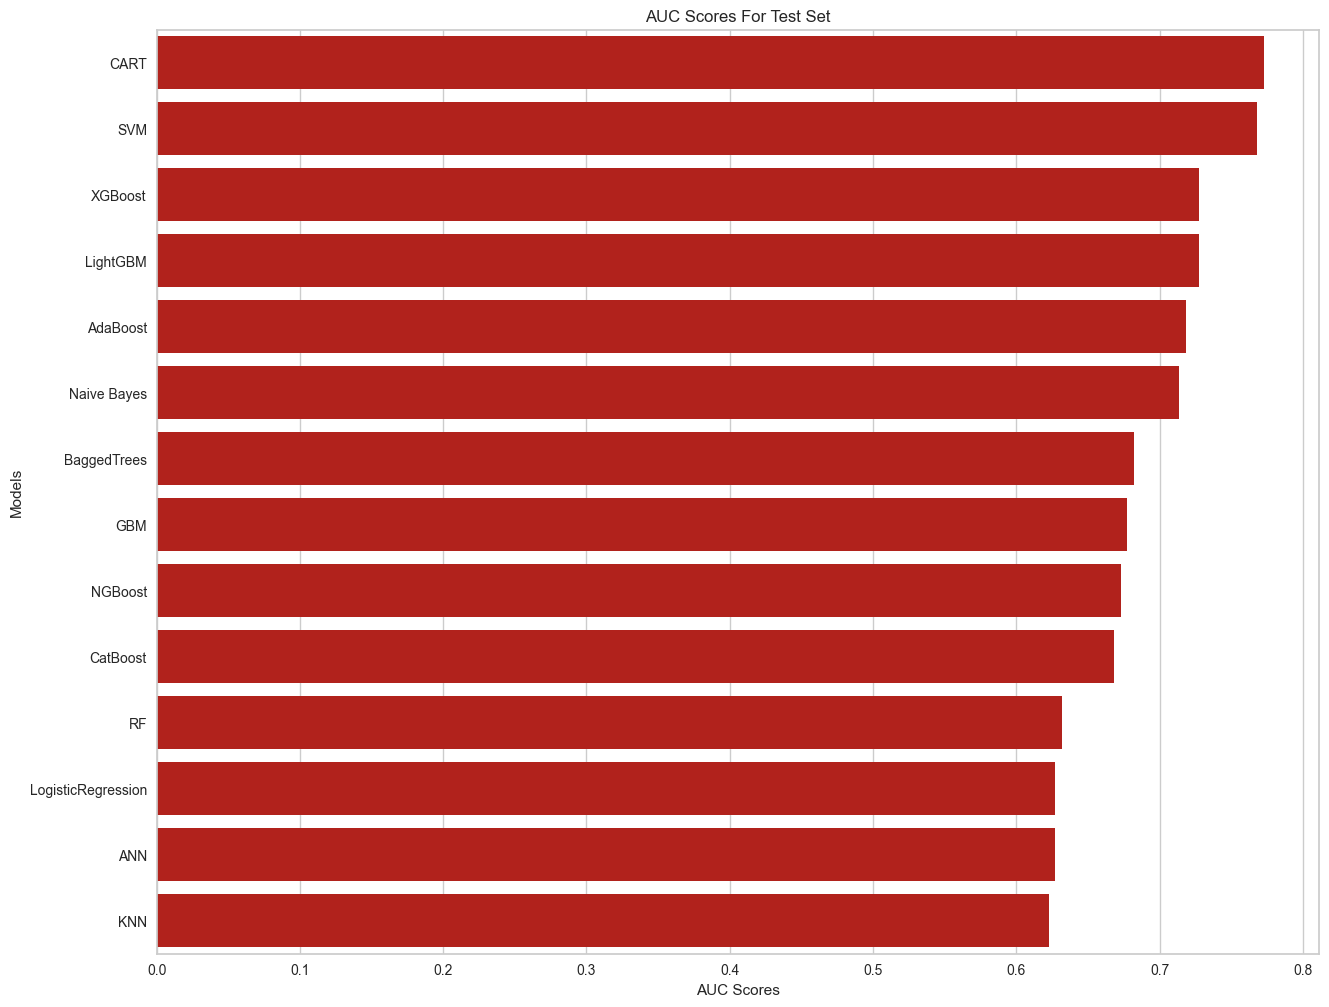

In [26]:
evaluate_classification_model_holdout(base_models)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.627273
Naive Bayes: 0.713636
KNN: 0.622727
SVM: 0.768182
ANN: 0.677273
CART: 0.718182
BaggedTrees: 0.522727
RF: 0.672727
AdaBoost: 0.718182
GBM: 0.677273
XGBoost: 0.727273
LightGBM: 0.727273
CatBoost: 0.668182
NGBoost: 0.672727

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.686          0.627
1          Naive Bayes           0.722          0.714
2                  KNN           0.699          0.623
3                  SVM           0.819          0.768
4                  ANN           0.976          0.677
5                 CART           1.000          0.718
6          BaggedTrees           0.963          0.523
7                   RF           1.000          0.673
8             AdaBoost           1.000          0.718
9                  GBM           1.000          0.677
10

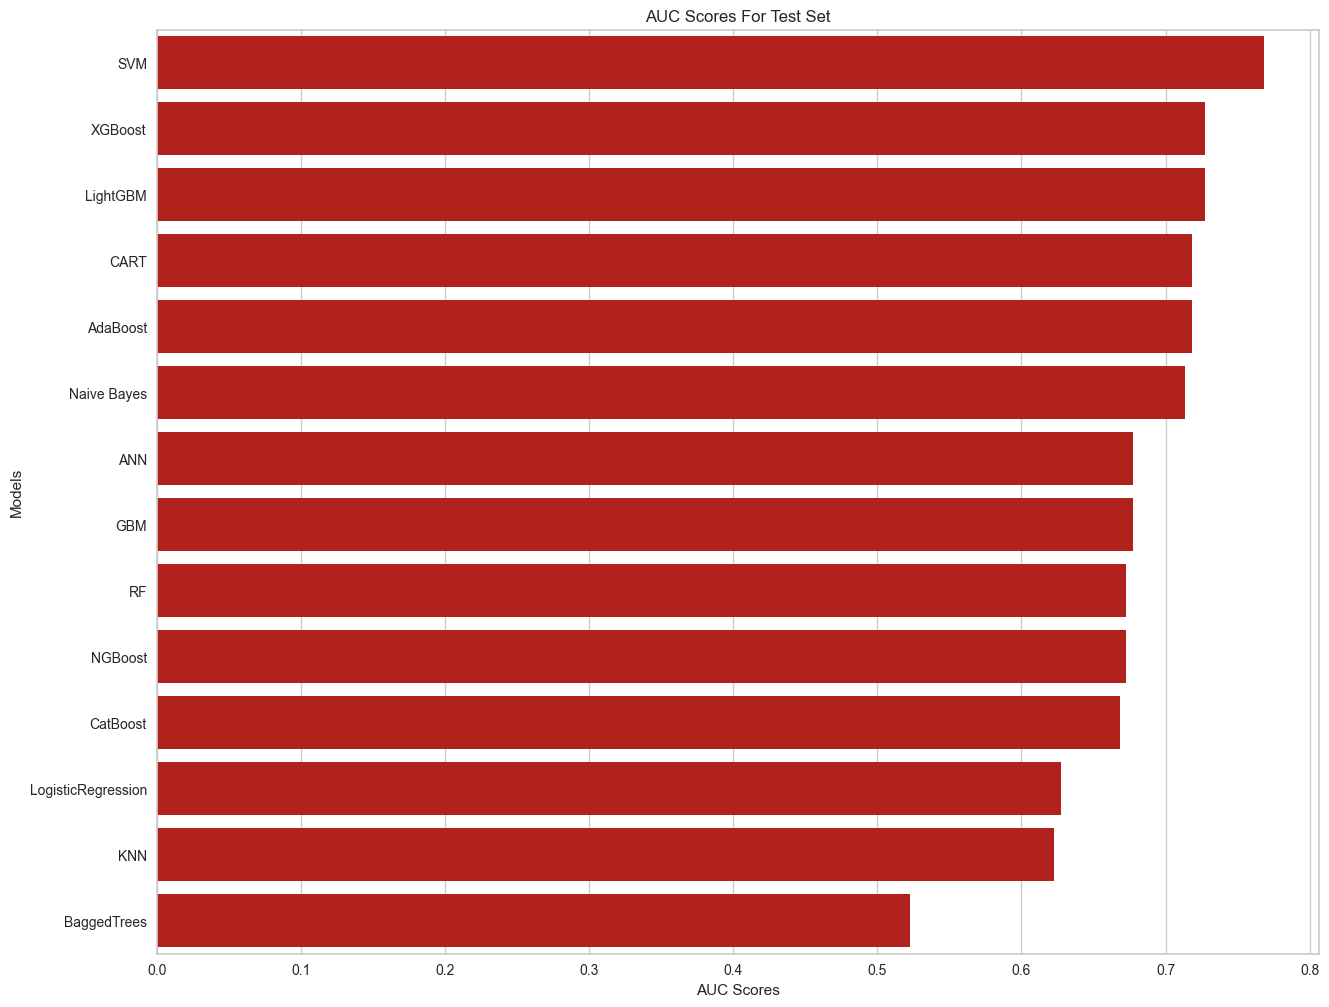

In [23]:
evaluate_classification_model_holdout(base_models)



In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [32]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.6727272727272727

In [33]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-LR73', Save_format = 'csv',Save_type = 'col')

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.55      0.63        11
    EGFR E21       0.62      0.80      0.70        10

    accuracy                           0.67        21
   macro avg       0.68      0.67      0.66        21
weighted avg       0.69      0.67      0.66        21

precision 0.6153846153846154 accuracy 0.6666666666666666 recall 0.8 auc 0.6727272727272727


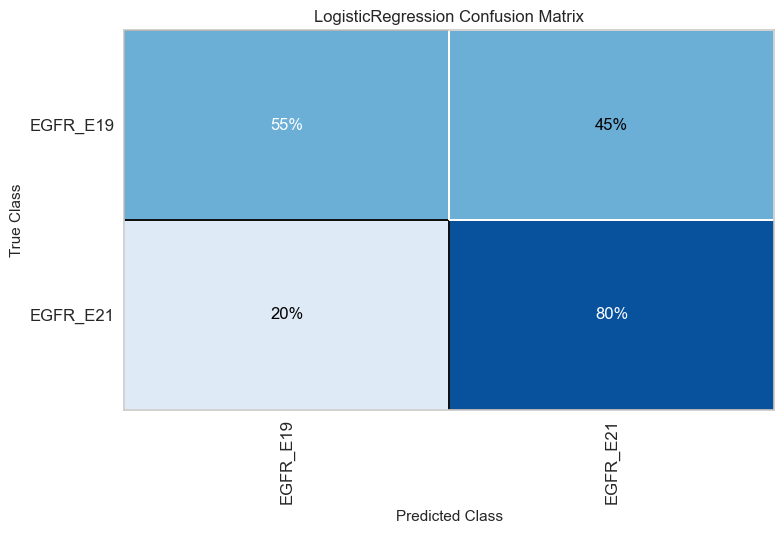

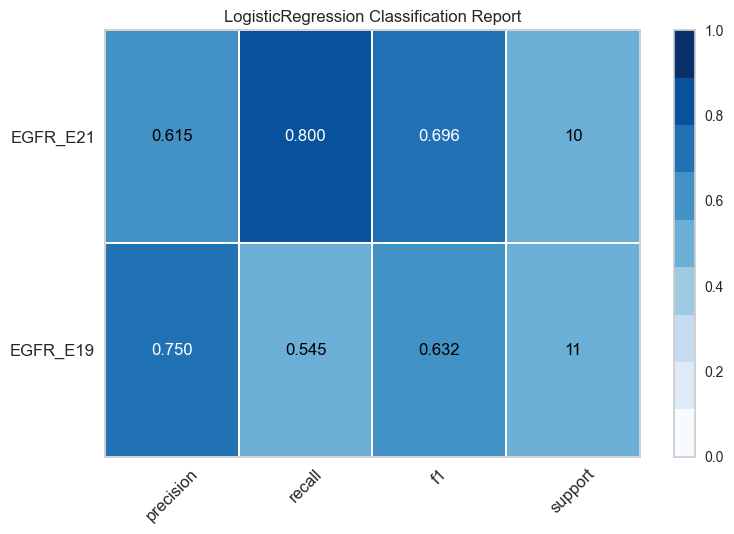

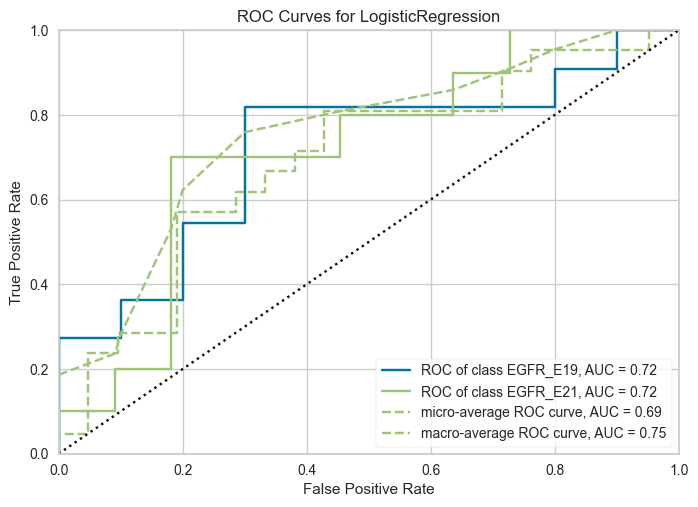

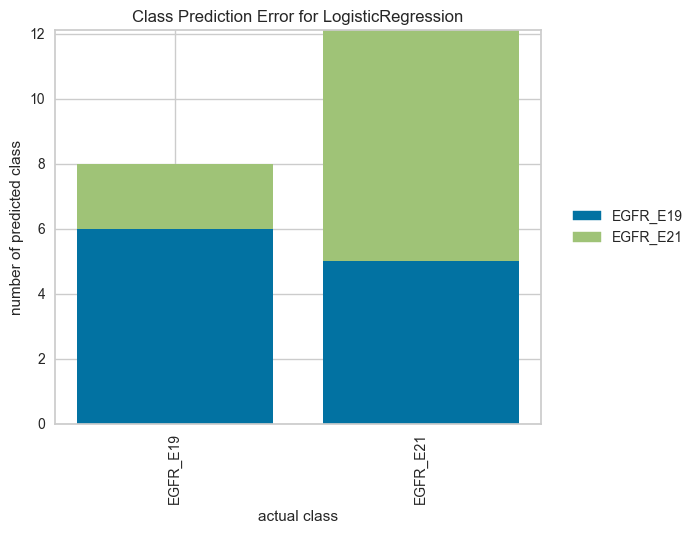

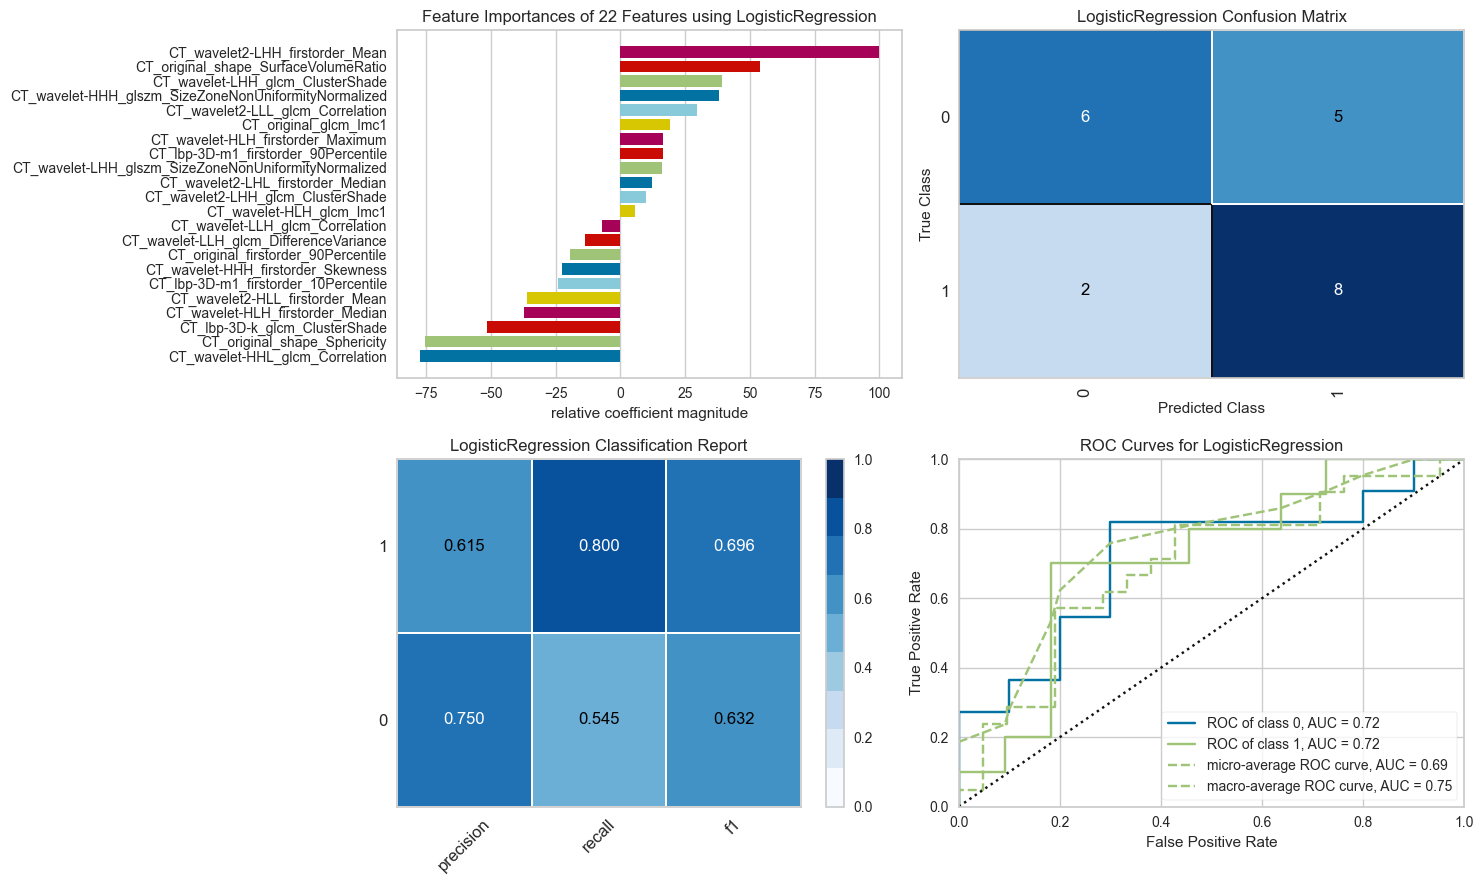

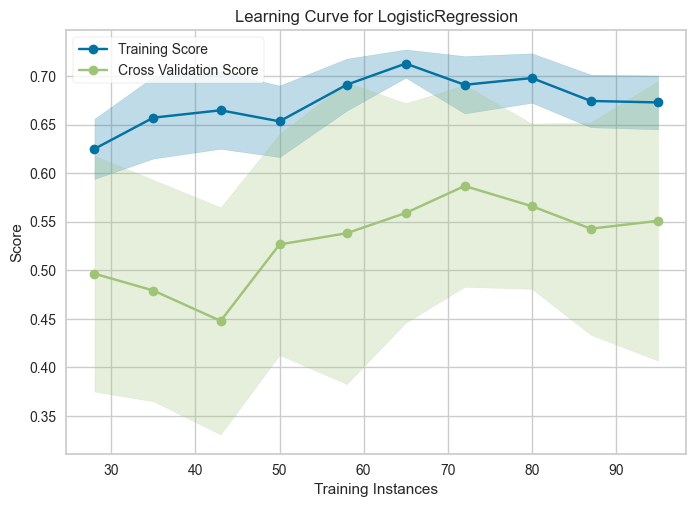

In [35]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [37]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.7181818181818183

In [38]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-RF73', Save_format = 'csv',Save_type = 'col')

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.78      0.64      0.70        11
    EGFR E21       0.67      0.80      0.73        10

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21

precision 0.6666666666666666 accuracy 0.7142857142857143 recall 0.8 auc 0.7181818181818183


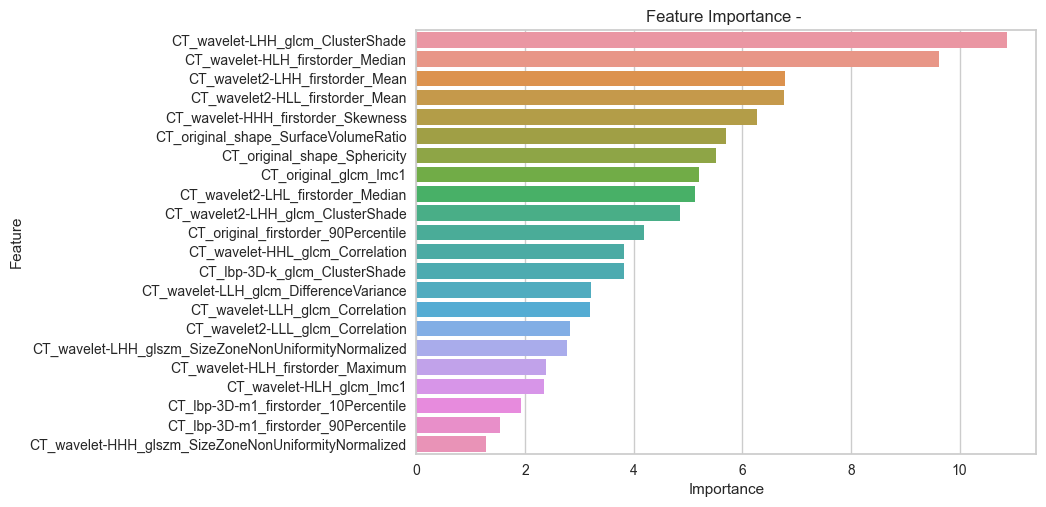

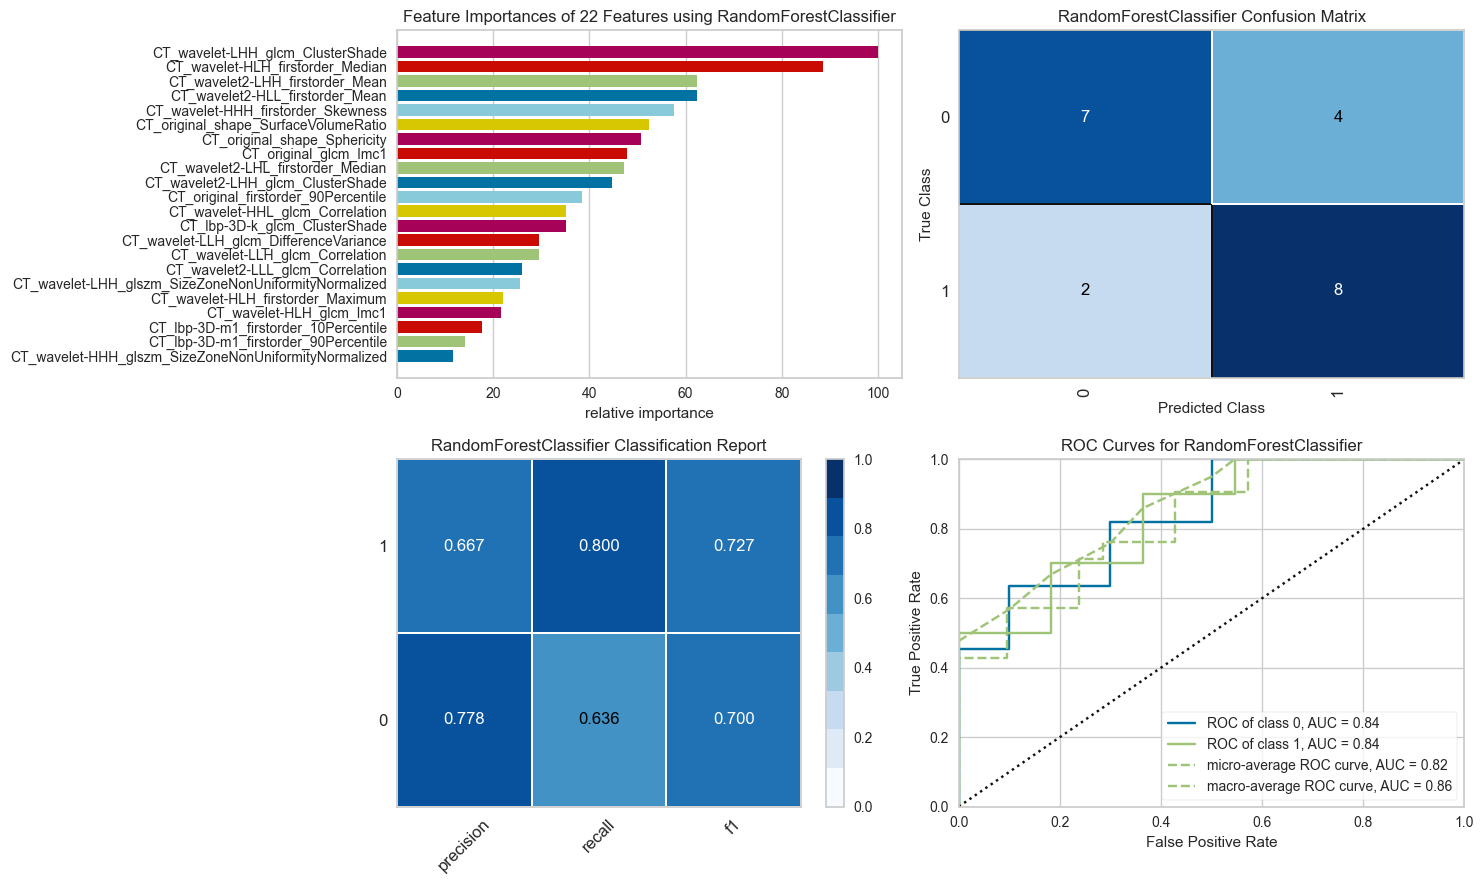

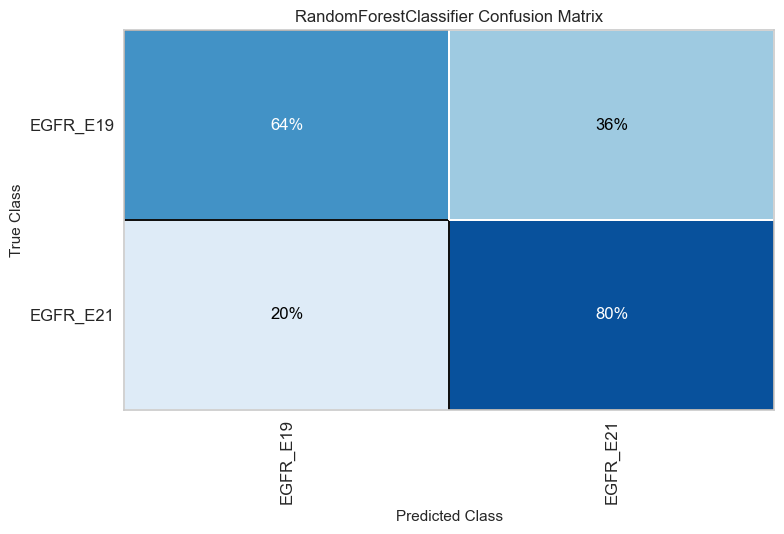

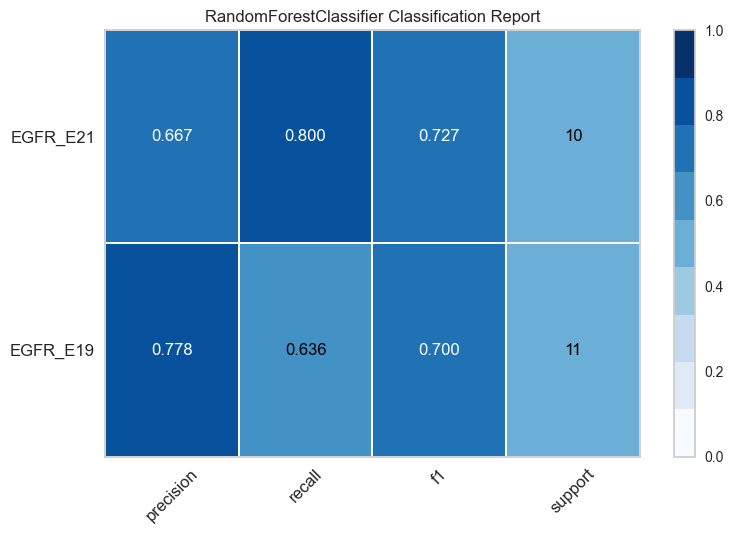

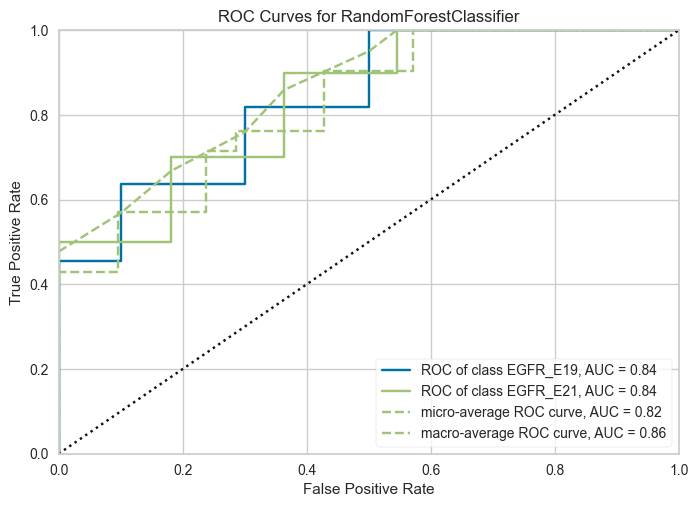

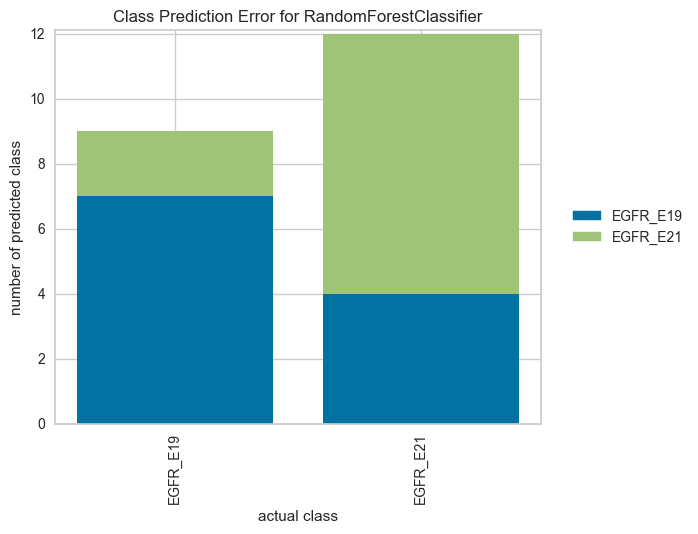

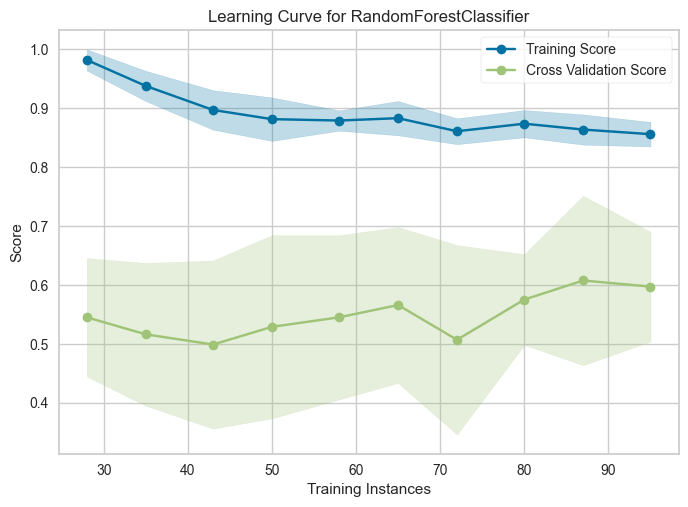

In [40]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [43]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6929186	total: 366us	remaining: 439ms
1:	learn: 0.6928506	total: 898us	remaining: 538ms
2:	learn: 0.6921588	total: 1.28ms	remaining: 513ms
3:	learn: 0.6903003	total: 1.68ms	remaining: 502ms
4:	learn: 0.6902122	total: 2.09ms	remaining: 499ms
5:	learn: 0.6881170	total: 2.42ms	remaining: 482ms
6:	learn: 0.6870616	total: 2.77ms	remaining: 472ms
7:	learn: 0.6863818	total: 3.08ms	remaining: 459ms
8:	learn: 0.6860292	total: 3.37ms	remaining: 447ms
9:	learn: 0.6854537	total: 3.68ms	remaining: 438ms
10:	learn: 0.6845800	total: 3.96ms	remaining: 428ms
11:	learn: 0.6843741	total: 4.33ms	remaining: 429ms
12:	learn: 0.6838314	total: 4.67ms	remaining: 426ms
13:	learn: 0.6828940	total: 4.99ms	remaining: 423ms
14:	learn: 0.6819673	total: 5.34ms	remaining: 422ms
15:	learn: 0.6802257	total: 5.7ms	remaining: 422ms
16:	learn: 0.6792358	total: 6.03ms	remaining: 420ms
17:	learn: 0.6787365	total: 6.37ms	remaining: 418ms
18:	learn: 0.6783702	total: 6.69ms	remaining: 416ms
19:	learn: 0.6777894	tota

486:	learn: 0.4912509	total: 149ms	remaining: 218ms
487:	learn: 0.4909733	total: 149ms	remaining: 217ms
488:	learn: 0.4906277	total: 149ms	remaining: 217ms
489:	learn: 0.4902917	total: 150ms	remaining: 217ms
490:	learn: 0.4899697	total: 150ms	remaining: 217ms
491:	learn: 0.4896541	total: 150ms	remaining: 216ms
492:	learn: 0.4893245	total: 151ms	remaining: 216ms
493:	learn: 0.4890549	total: 151ms	remaining: 216ms
494:	learn: 0.4887130	total: 151ms	remaining: 215ms
495:	learn: 0.4884955	total: 151ms	remaining: 215ms
496:	learn: 0.4882371	total: 152ms	remaining: 215ms
497:	learn: 0.4879165	total: 152ms	remaining: 214ms
498:	learn: 0.4875984	total: 152ms	remaining: 214ms
499:	learn: 0.4873836	total: 153ms	remaining: 214ms
500:	learn: 0.4871169	total: 153ms	remaining: 213ms
501:	learn: 0.4868864	total: 153ms	remaining: 213ms
502:	learn: 0.4865965	total: 154ms	remaining: 213ms
503:	learn: 0.4862113	total: 154ms	remaining: 213ms
504:	learn: 0.4859110	total: 154ms	remaining: 212ms
505:	learn: 

989:	learn: 0.3697357	total: 302ms	remaining: 64ms
990:	learn: 0.3696092	total: 302ms	remaining: 63.7ms
991:	learn: 0.3694320	total: 302ms	remaining: 63.4ms
992:	learn: 0.3693068	total: 303ms	remaining: 63.1ms
993:	learn: 0.3691285	total: 303ms	remaining: 62.8ms
994:	learn: 0.3690032	total: 303ms	remaining: 62.5ms
995:	learn: 0.3688346	total: 304ms	remaining: 62.2ms
996:	learn: 0.3686479	total: 304ms	remaining: 61.9ms
997:	learn: 0.3684650	total: 304ms	remaining: 61.6ms
998:	learn: 0.3683057	total: 305ms	remaining: 61.3ms
999:	learn: 0.3681329	total: 305ms	remaining: 61ms
1000:	learn: 0.3679696	total: 305ms	remaining: 60.7ms
1001:	learn: 0.3677854	total: 306ms	remaining: 60.4ms
1002:	learn: 0.3676201	total: 306ms	remaining: 60.1ms
1003:	learn: 0.3674529	total: 306ms	remaining: 59.8ms
1004:	learn: 0.3673278	total: 306ms	remaining: 59.5ms
1005:	learn: 0.3671588	total: 307ms	remaining: 59.1ms
1006:	learn: 0.3669729	total: 307ms	remaining: 58.8ms
1007:	learn: 0.3666882	total: 307ms	remaini

0.6666666666666666

In [44]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [45]:
# shap.dependence_plot(y_train, shap_values, X_train)

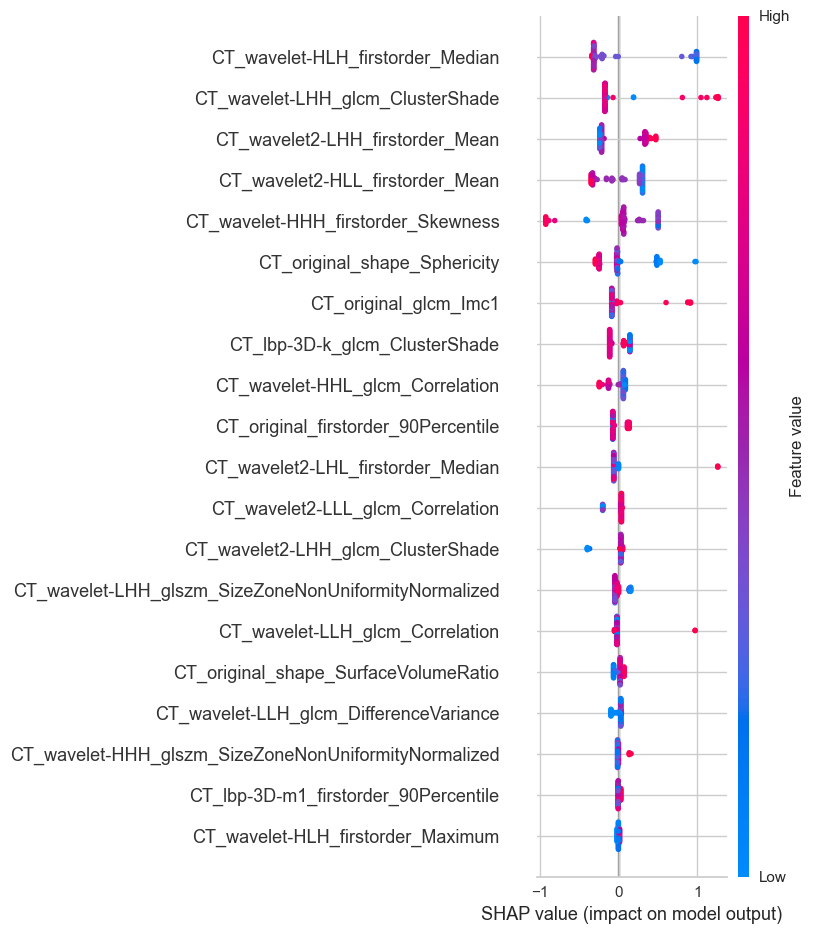

In [46]:

shap.summary_plot(shap_values, X_train)

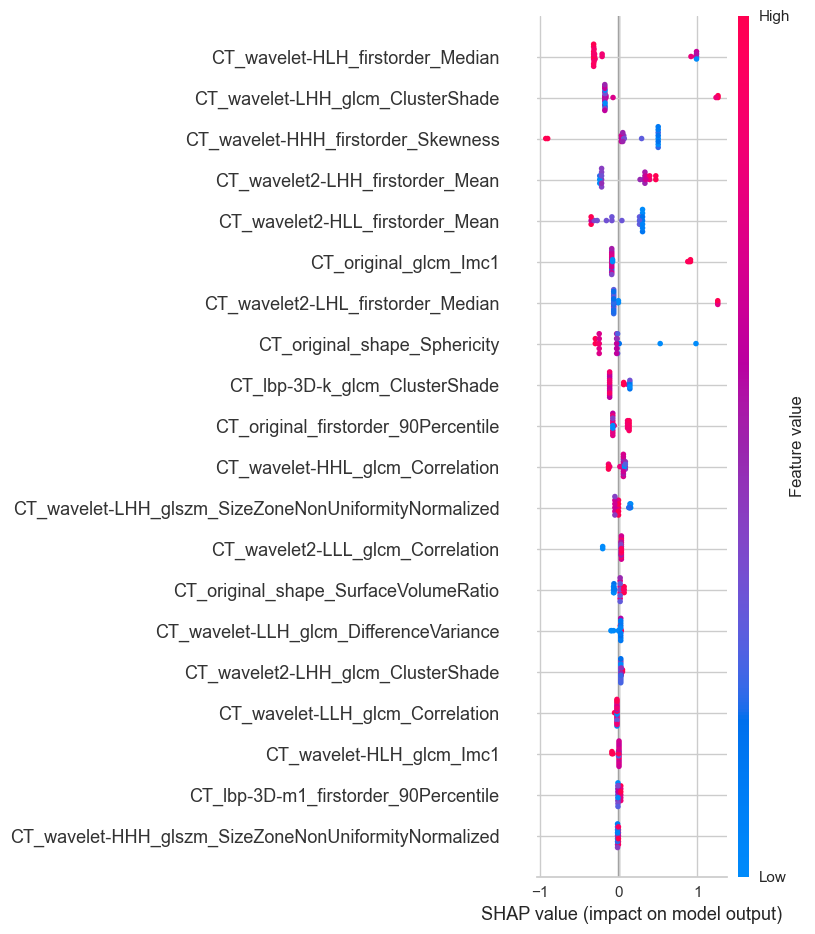

In [47]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [48]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [49]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-CBC73', Save_format = 'csv',Save_type = 'col')

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.83      0.45      0.59        11
    EGFR E21       0.60      0.90      0.72        10

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

precision 0.6 accuracy 0.6666666666666666 recall 0.9 auc 0.6772727272727272


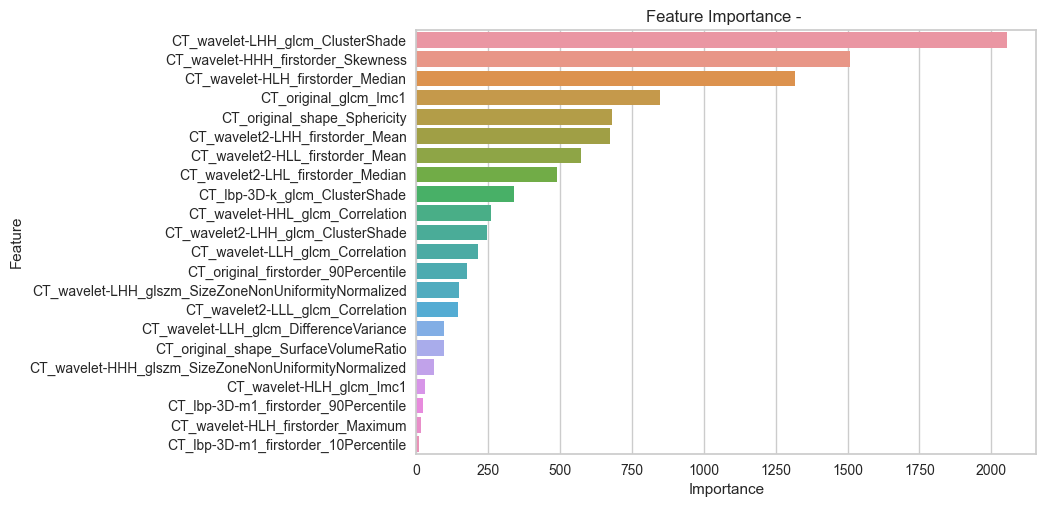

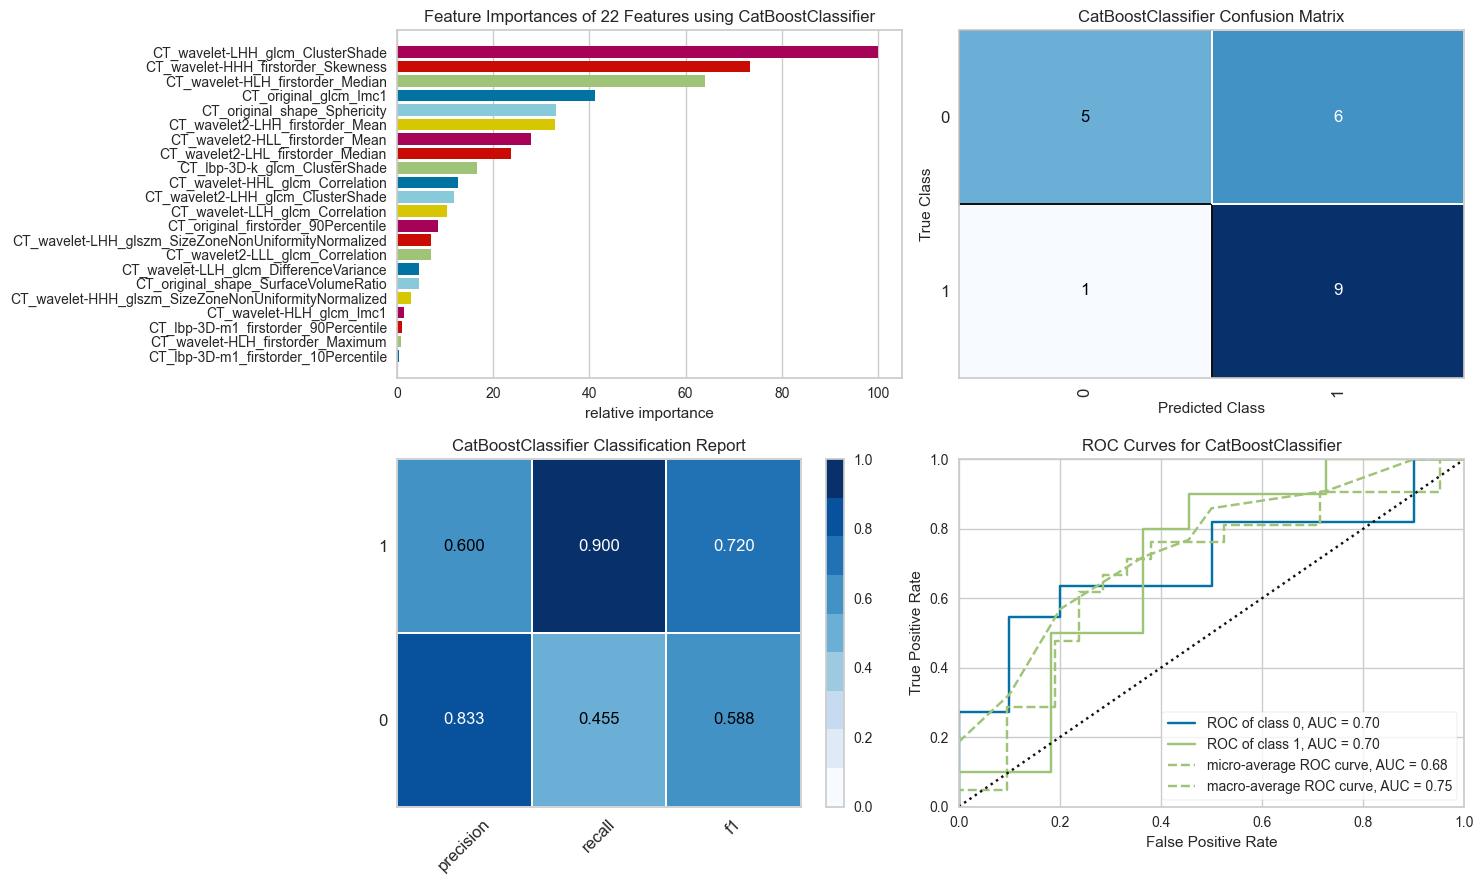

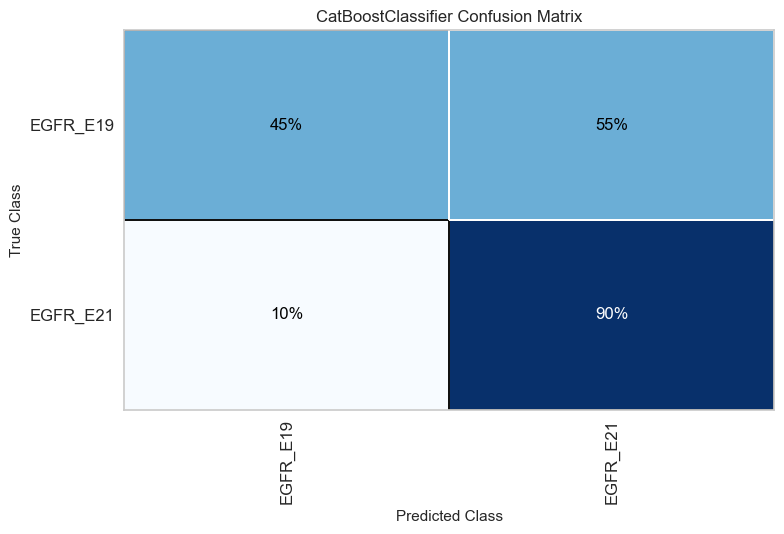

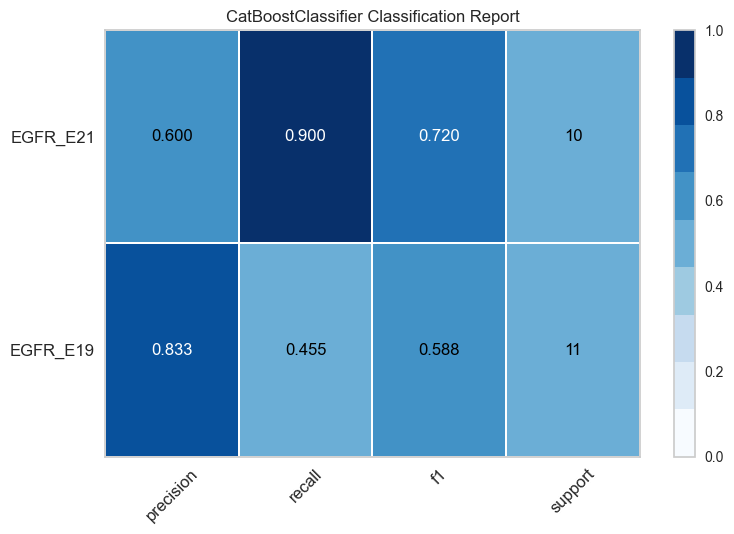

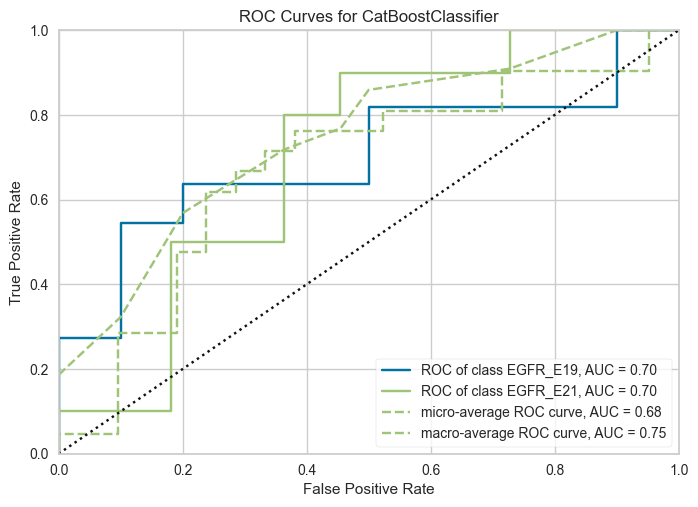

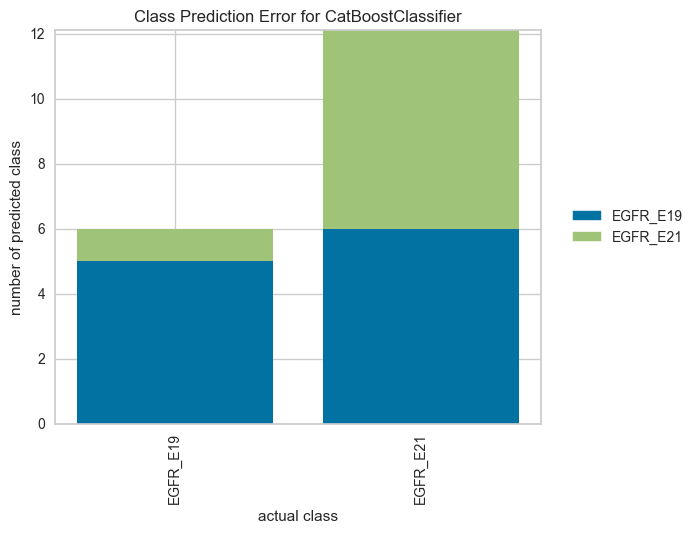

TypeError: __init__() got an unexpected keyword argument 'iterations'

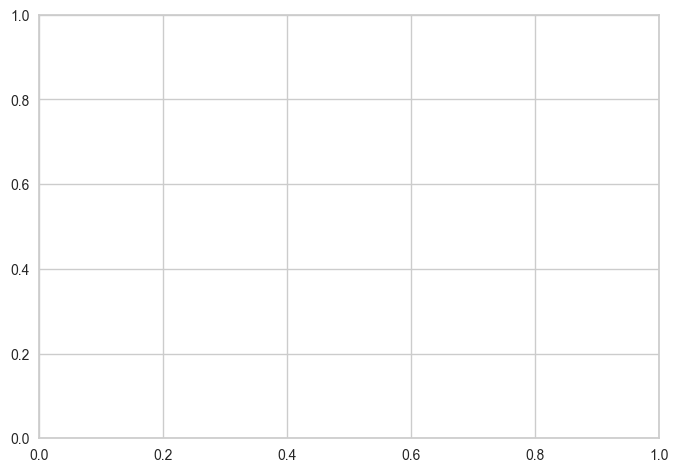

In [51]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [59]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6666666666666666

In [60]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-ADB73', Save_format = 'csv',Save_type = 'col')

In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.83      0.45      0.59        11
    EGFR E21       0.60      0.90      0.72        10

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

precision 0.6 accuracy 0.6666666666666666 recall 0.9 auc 0.6772727272727272


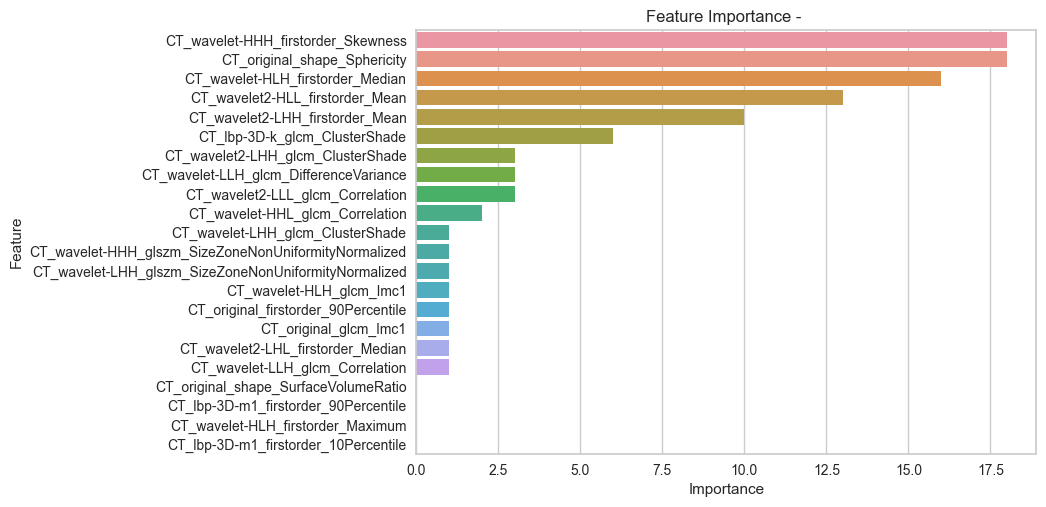

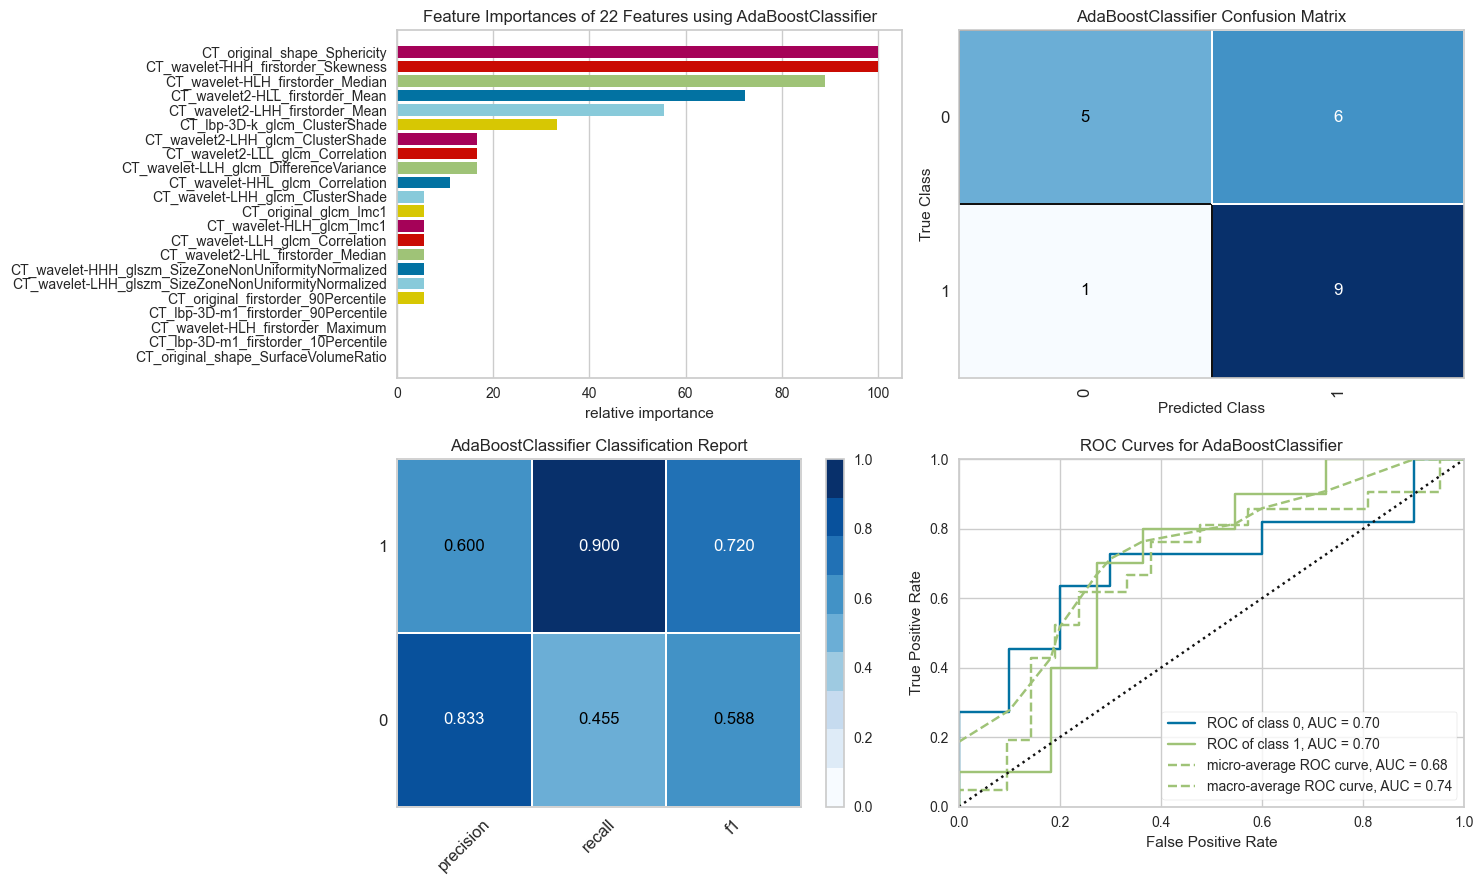

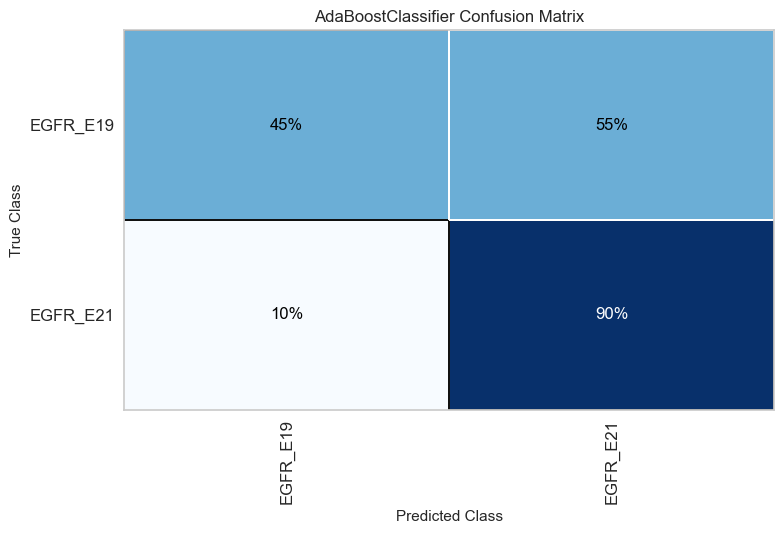

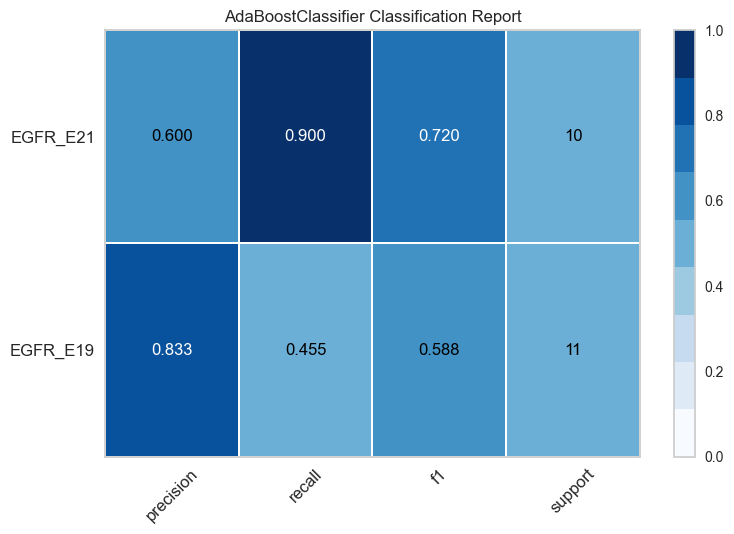

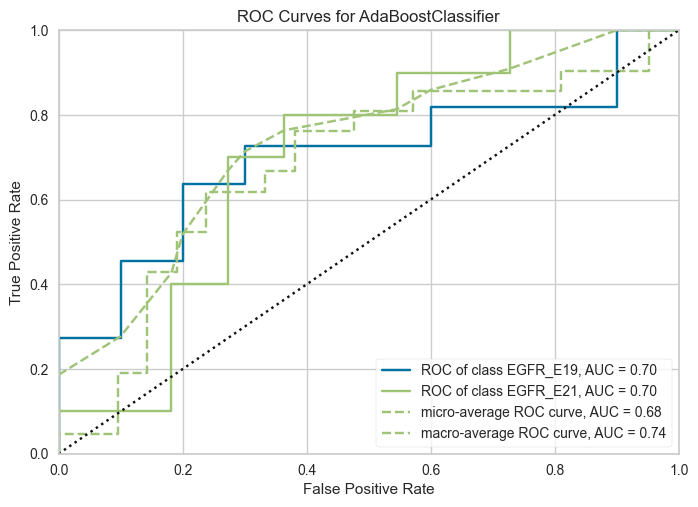

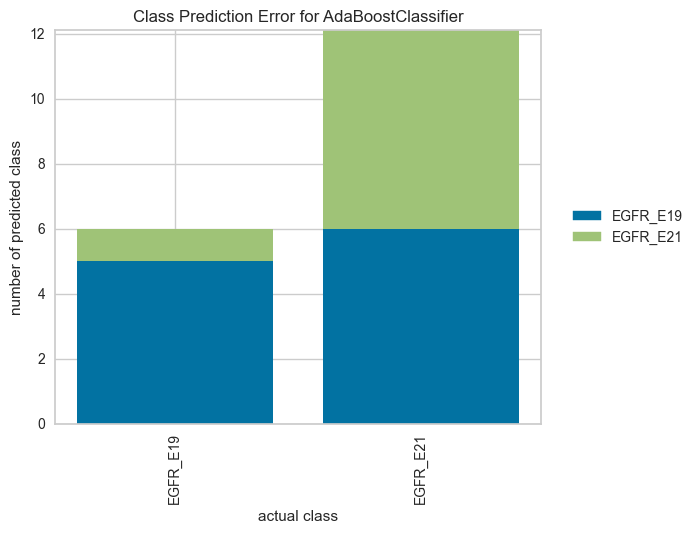

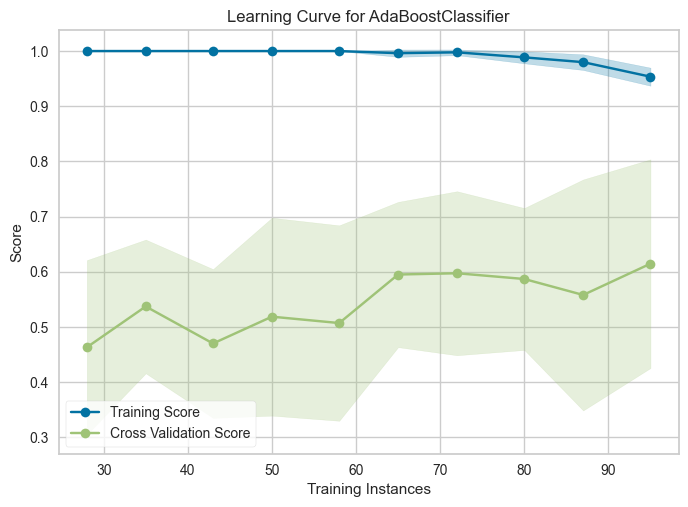

In [62]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)

report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [64]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6666666666666666

In [65]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-gbdt', Save_format = 'csv',Save_type = 'col')

In [66]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.83      0.45      0.59        11
    EGFR E21       0.60      0.90      0.72        10

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

precision 0.6 accuracy 0.6666666666666666 recall 0.9 auc 0.6772727272727272


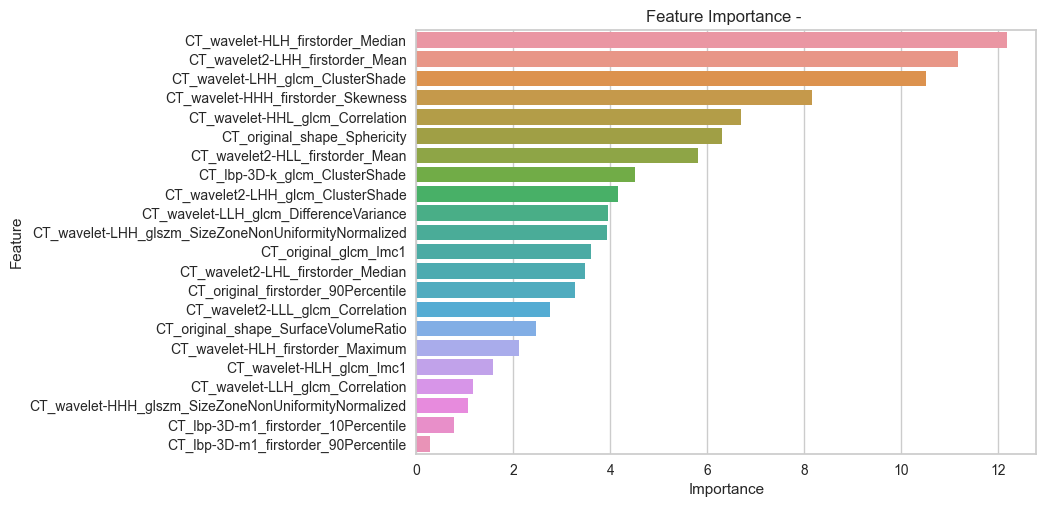

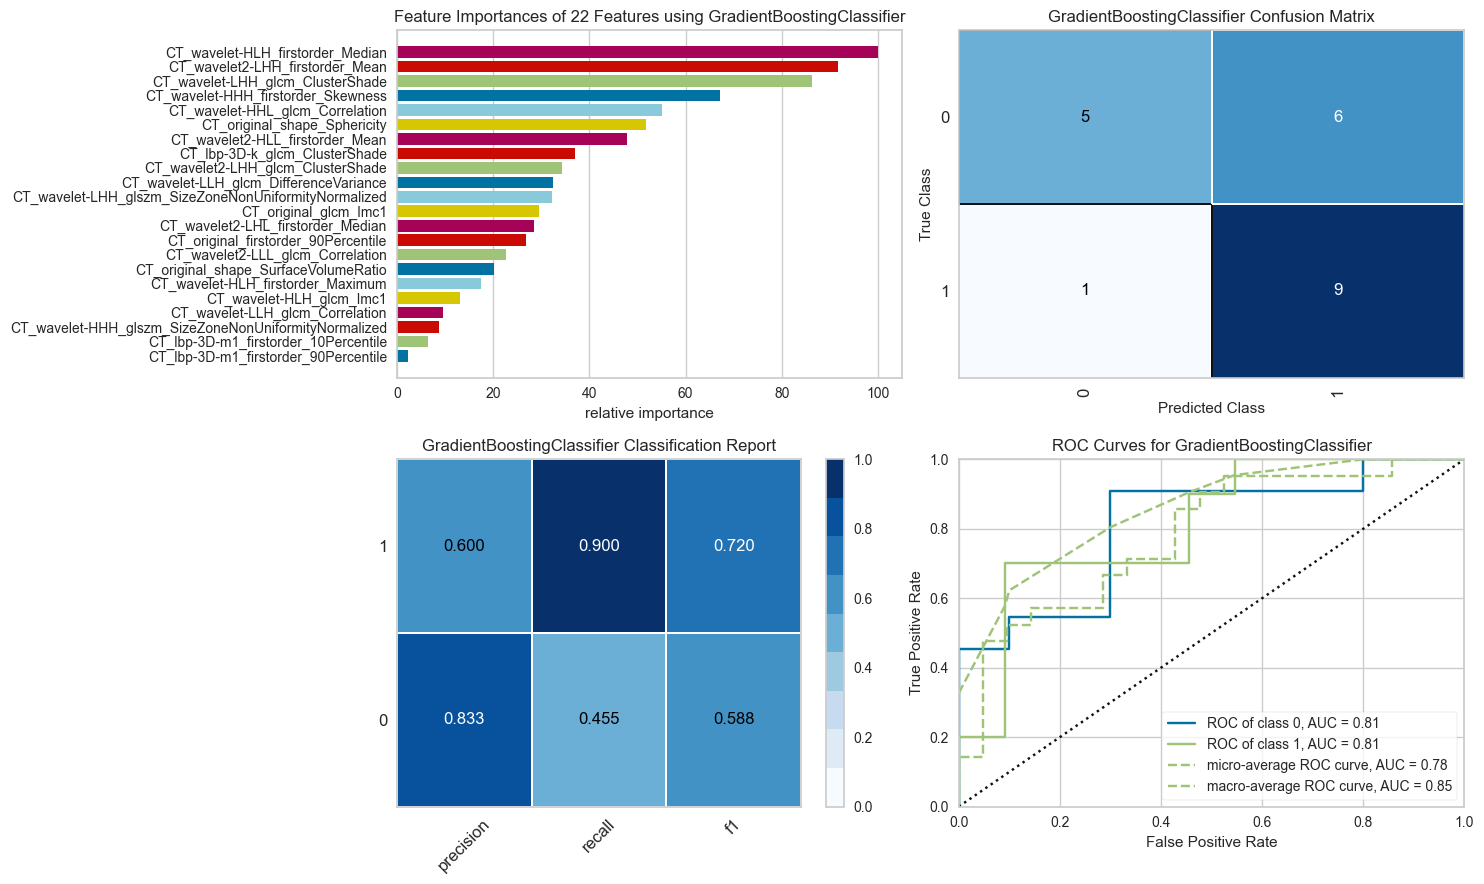

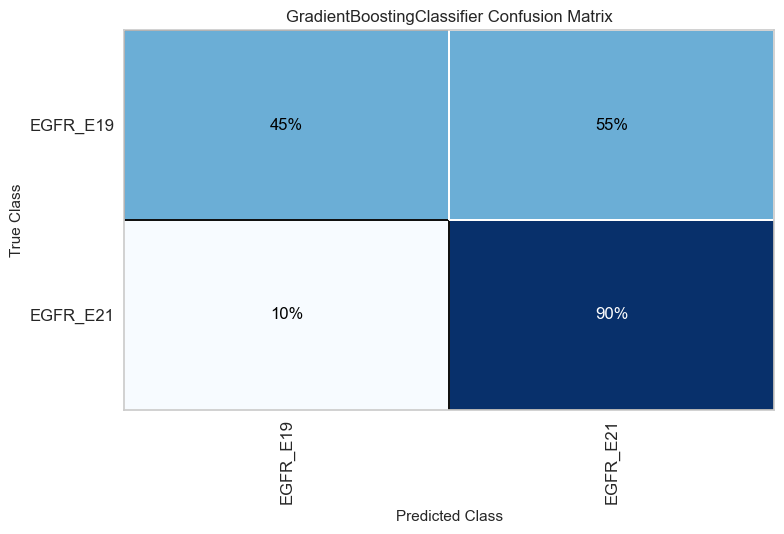

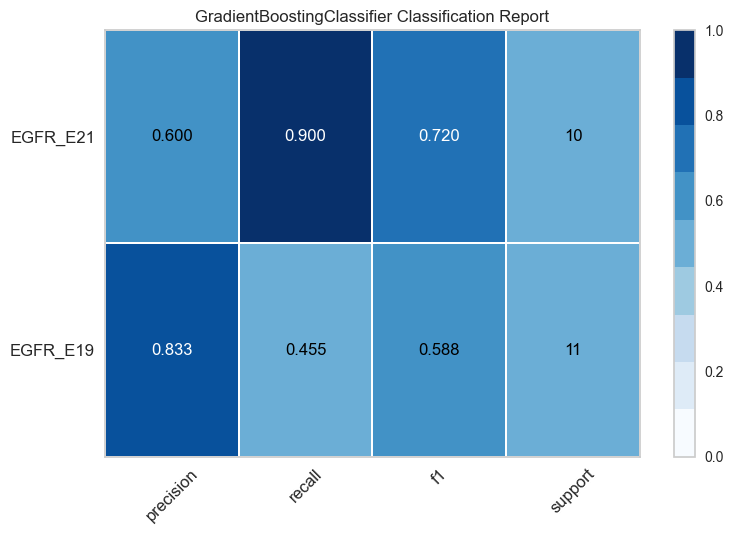

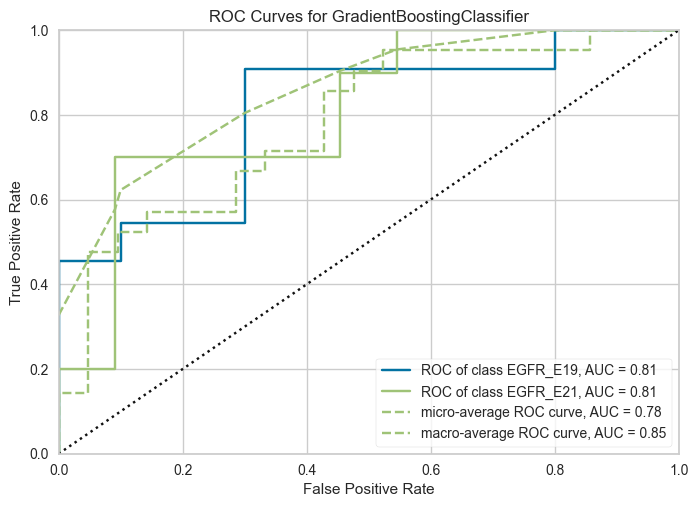

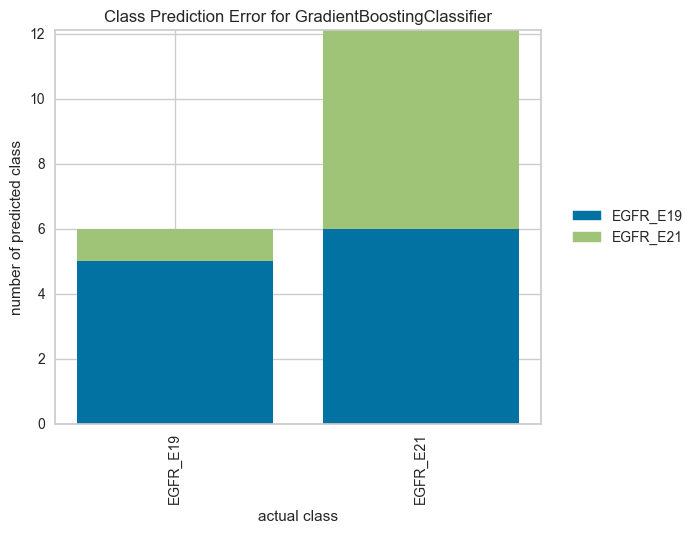

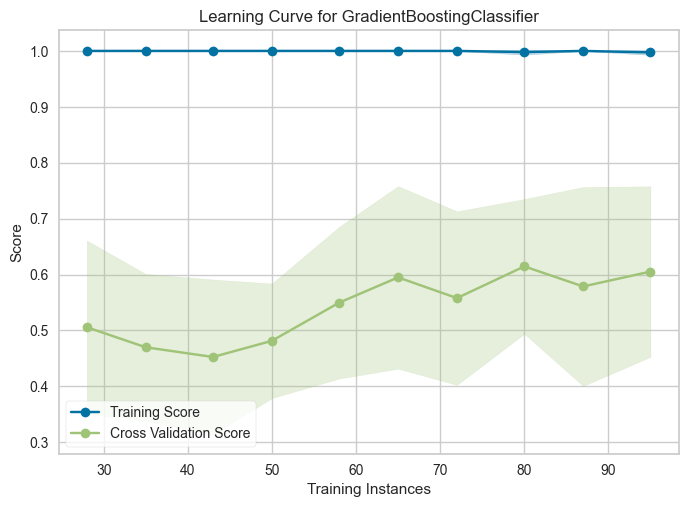

In [67]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [75]:
print(svm_model.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [76]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.7142857142857143 0.7227272727272727


In [77]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-SVM73', Save_format = 'csv',Save_type = 'col')

In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.86      0.55      0.67        11
    EGFR E21       0.64      0.90      0.75        10

    accuracy                           0.71        21
   macro avg       0.75      0.72      0.71        21
weighted avg       0.76      0.71      0.71        21

precision 0.6428571428571429 accuracy 0.7142857142857143 recall 0.9 auc 0.7227272727272727


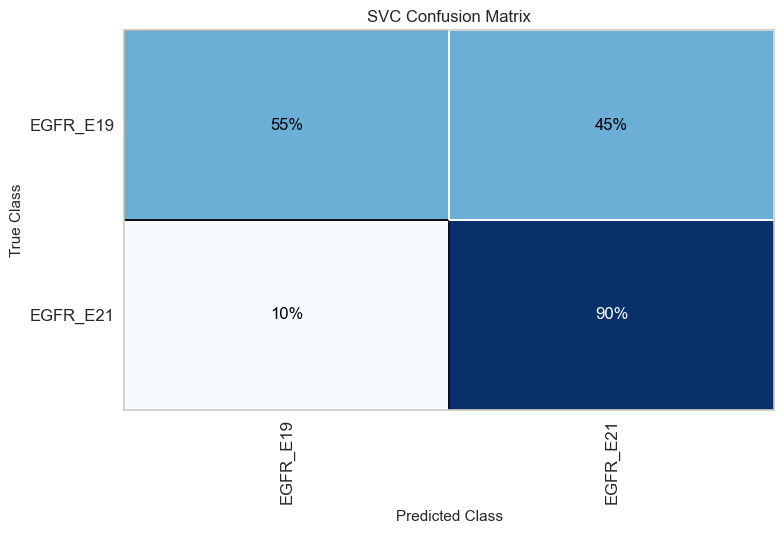

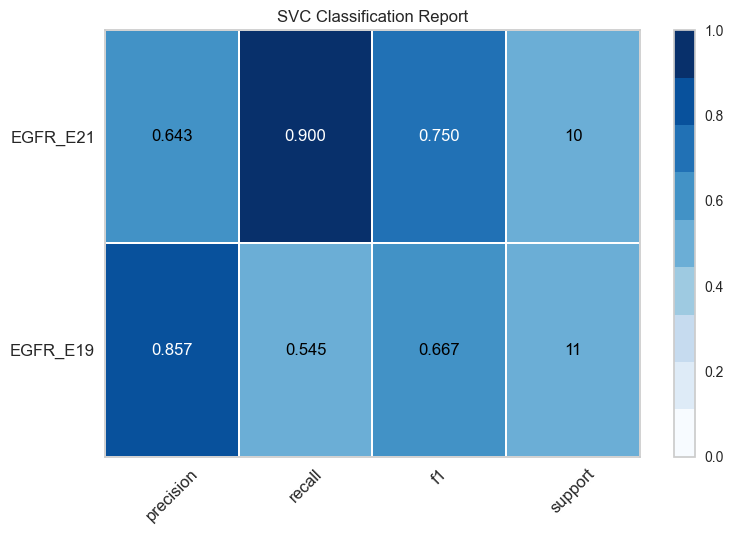

ModelError: no curves will be drawn; set binary=True.

In [79]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [82]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.7142857142857143

In [83]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-XGB73', Save_format = 'csv',Save_type = 'col')

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.86      0.55      0.67        11
    EGFR E21       0.64      0.90      0.75        10

    accuracy                           0.71        21
   macro avg       0.75      0.72      0.71        21
weighted avg       0.76      0.71      0.71        21

precision 0.6428571428571429 accuracy 0.7142857142857143 recall 0.9 auc 0.7227272727272727


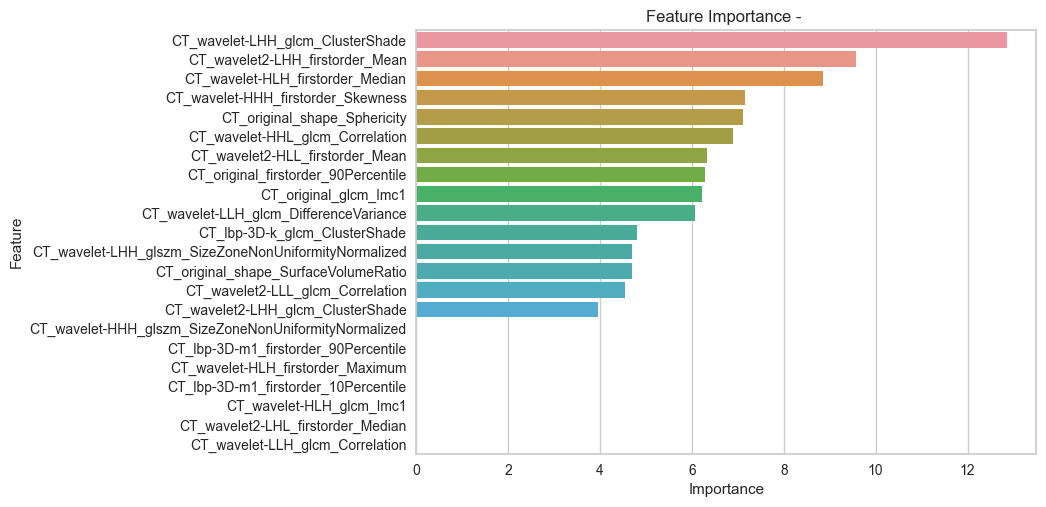

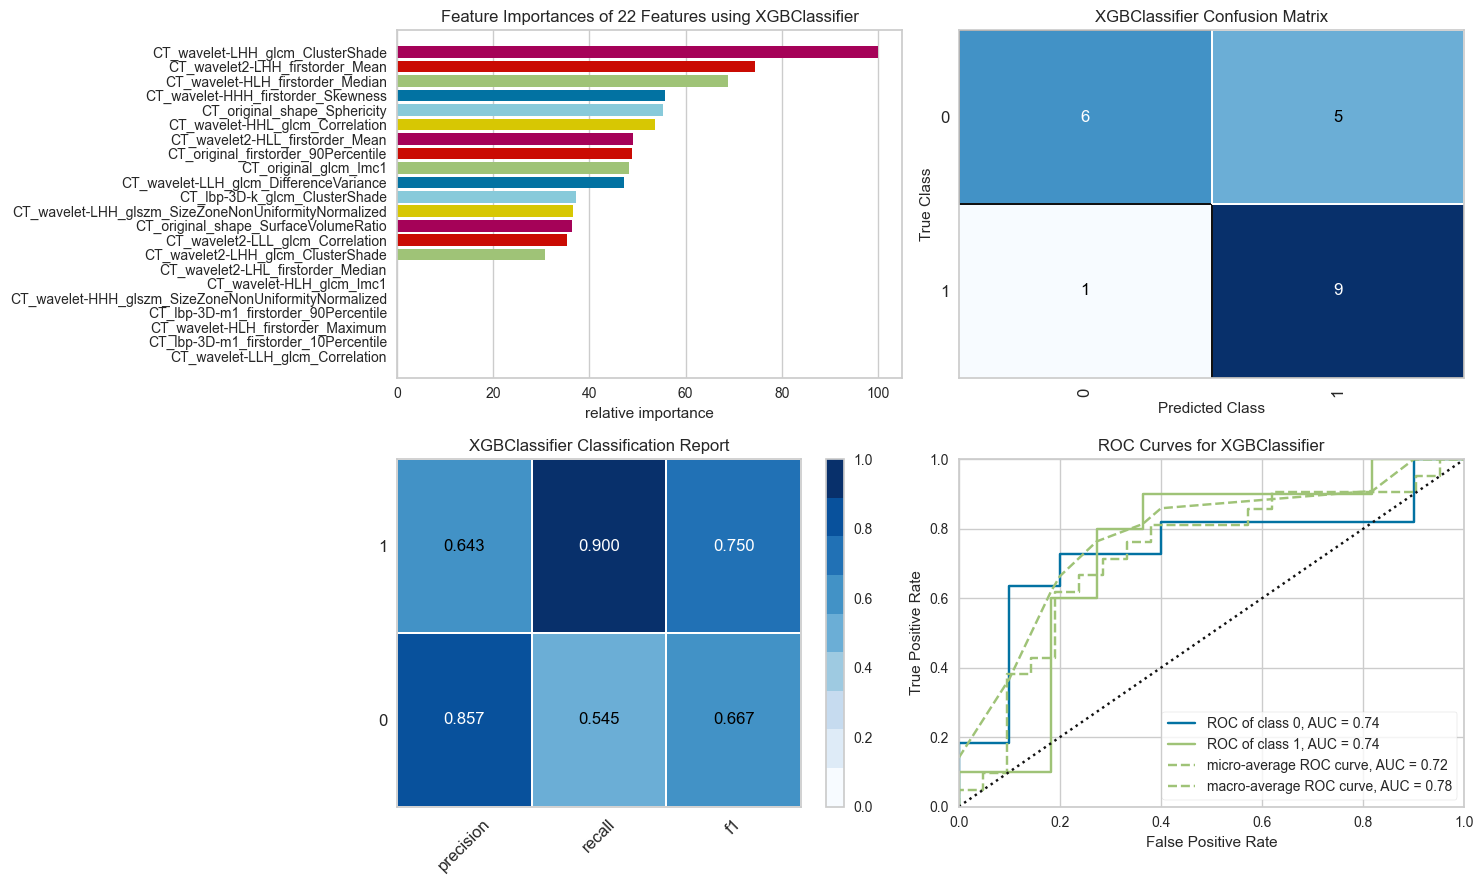

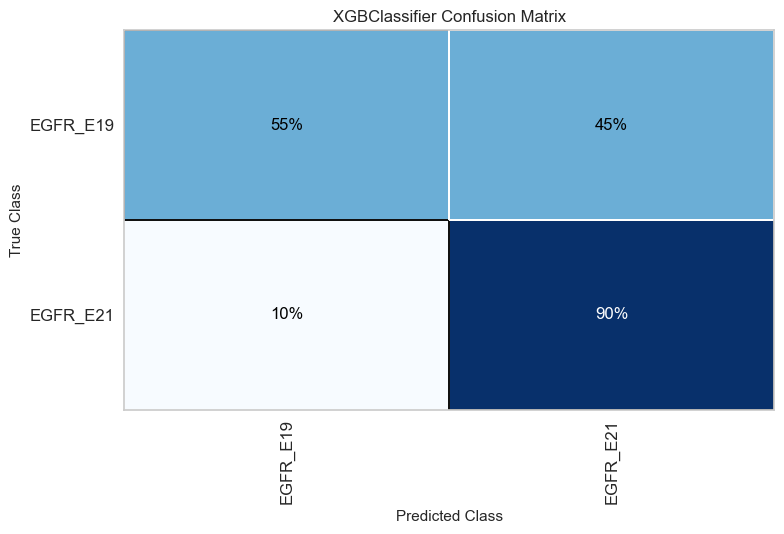

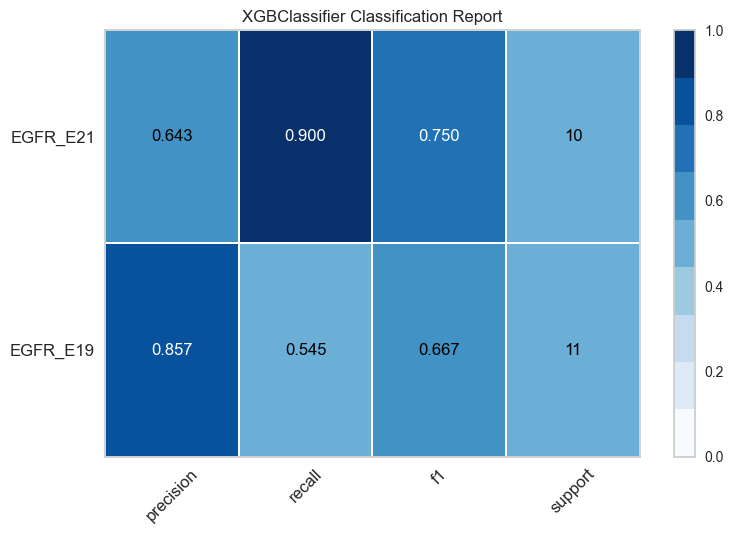

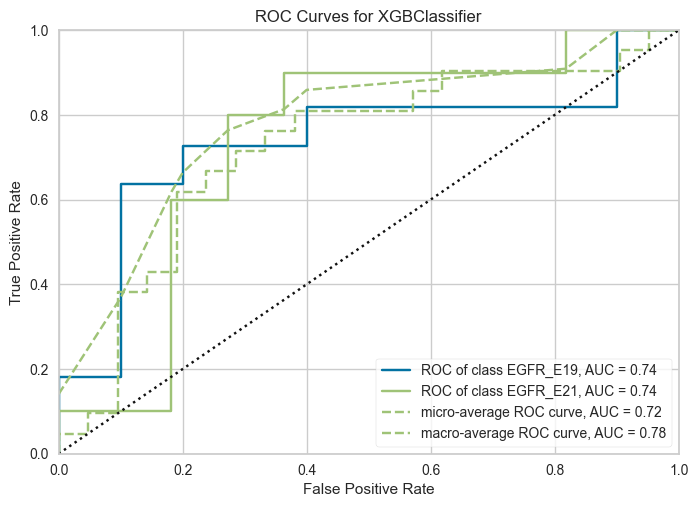

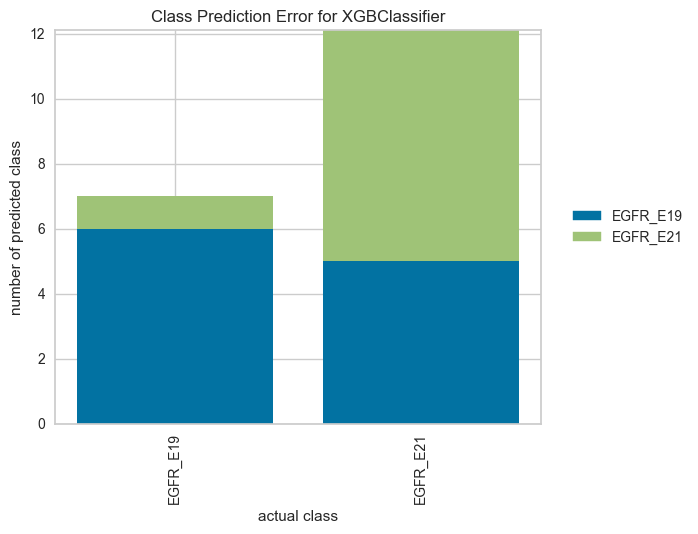

In [85]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [29]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.7619047619047619

In [31]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-lgb73', Save_format = 'csv',Save_type = 'col')

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       1.00      0.55      0.71        11
    EGFR E21       0.67      1.00      0.80        10

    accuracy                           0.76        21
   macro avg       0.83      0.77      0.75        21
weighted avg       0.84      0.76      0.75        21

precision 0.6666666666666666 accuracy 0.7619047619047619 recall 1.0 auc 0.7727272727272727


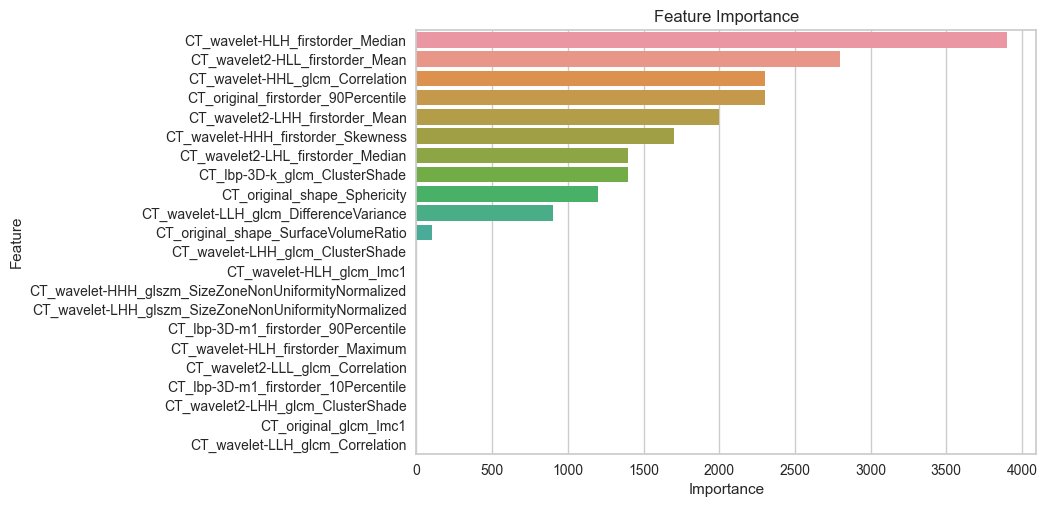

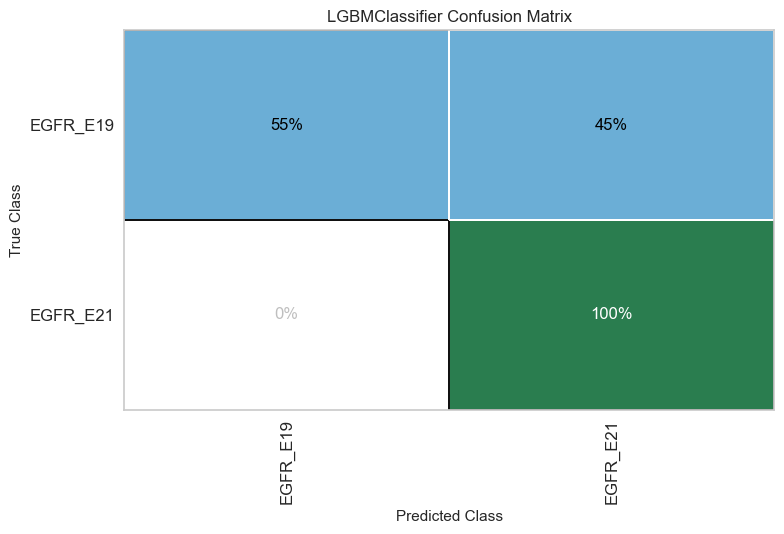

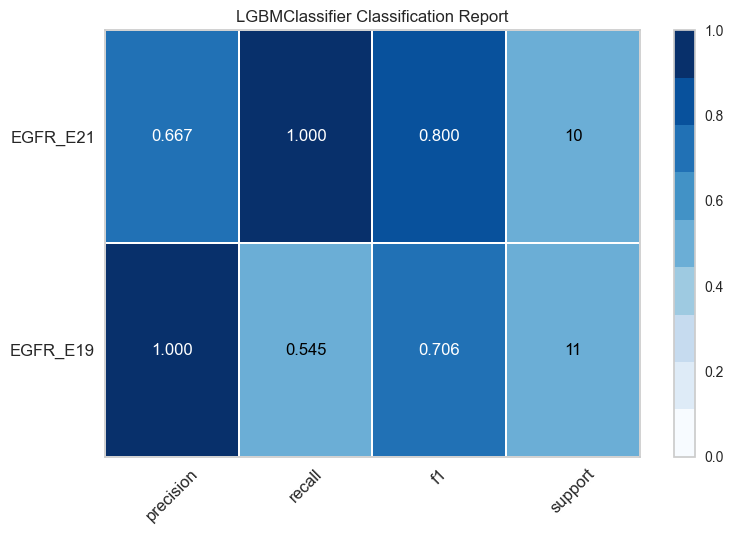

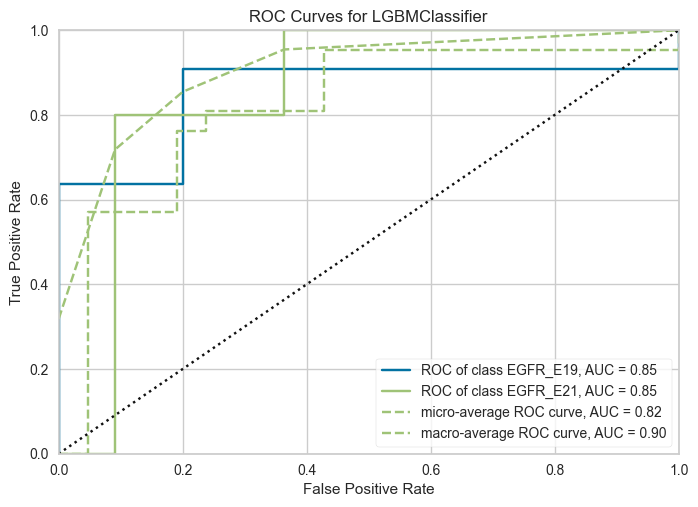

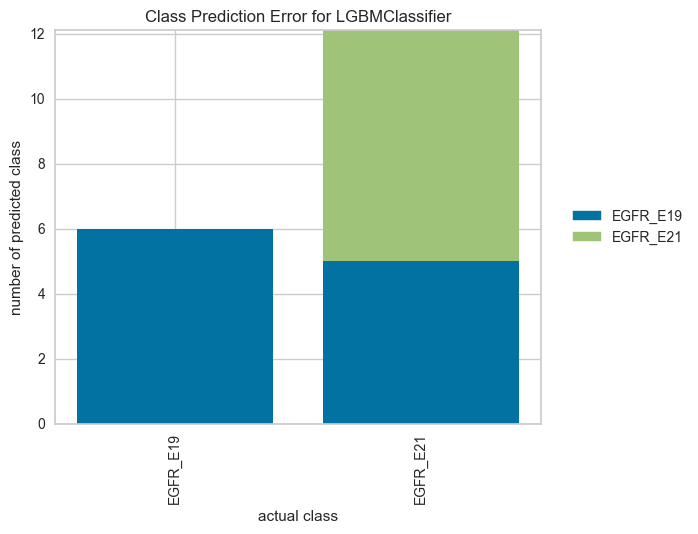

In [30]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [34]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)


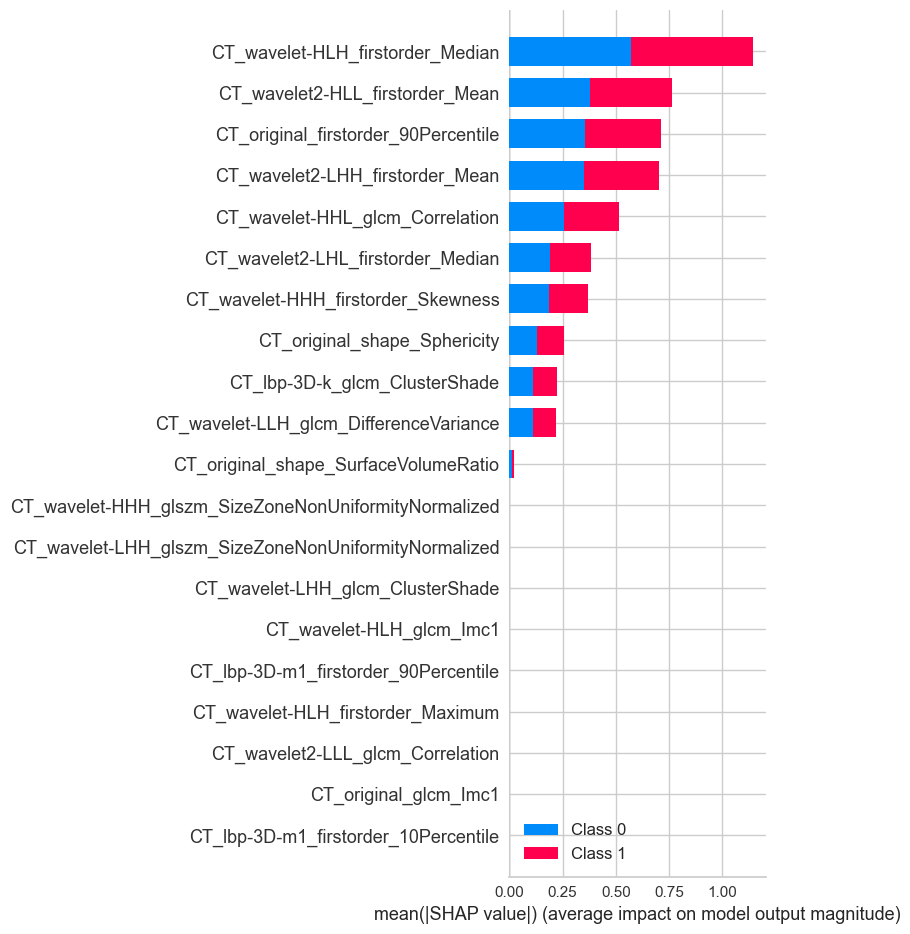

In [37]:
shap.summary_plot(shap_values, X_train)

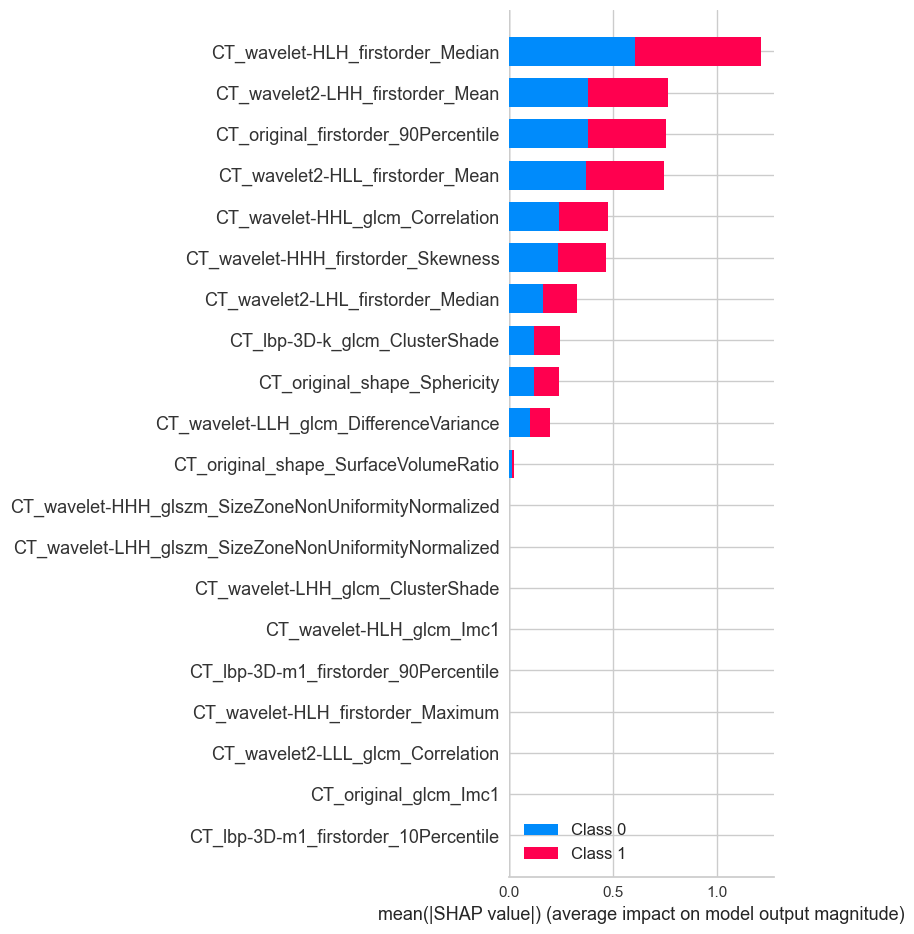

In [38]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [39]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [87]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.7619047619047619

In [88]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-lgb73', Save_format = 'csv',Save_type = 'col')

In [89]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM221-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       1.00      0.55      0.71        11
    EGFR E21       0.67      1.00      0.80        10

    accuracy                           0.76        21
   macro avg       0.83      0.77      0.75        21
weighted avg       0.84      0.76      0.75        21

precision 0.6666666666666666 accuracy 0.7619047619047619 recall 1.0 auc 0.7727272727272727


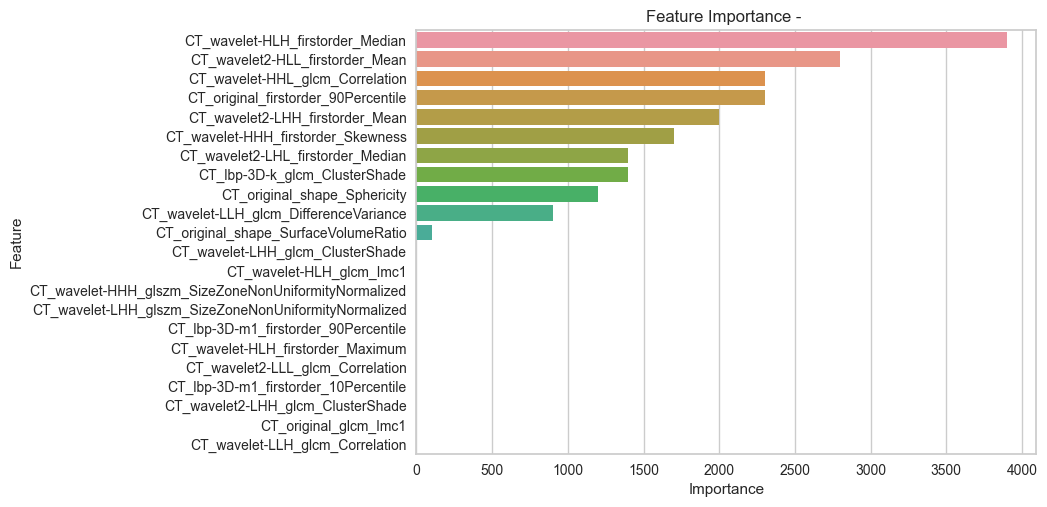

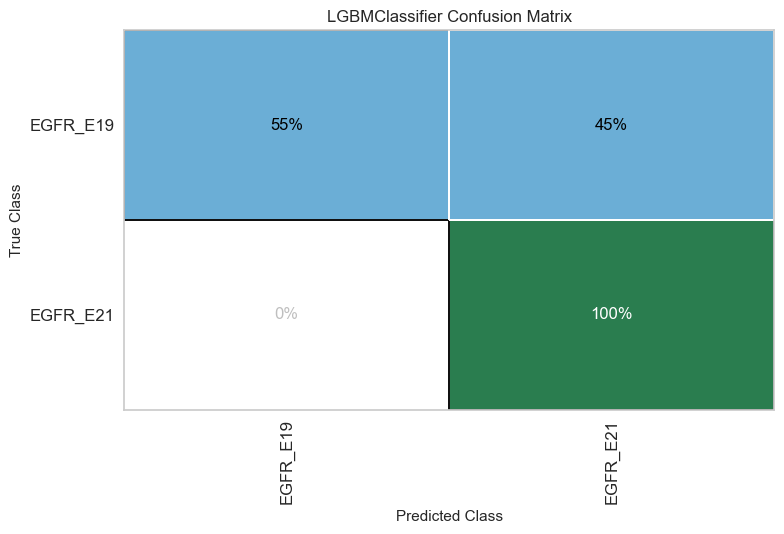

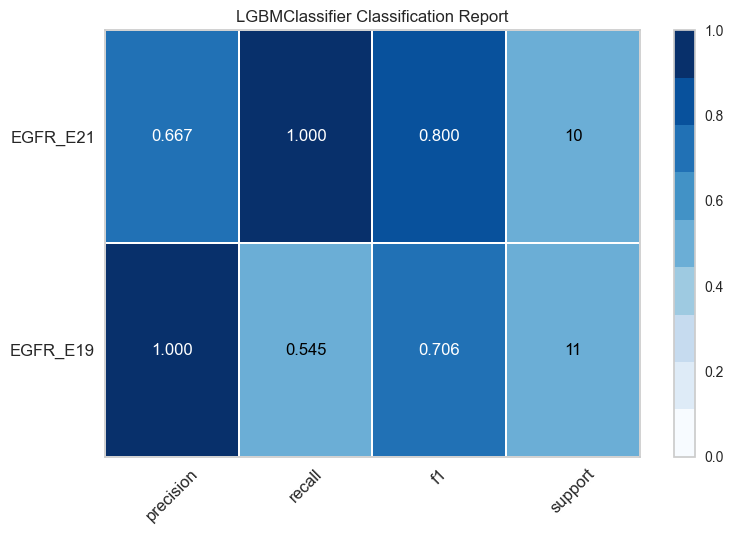

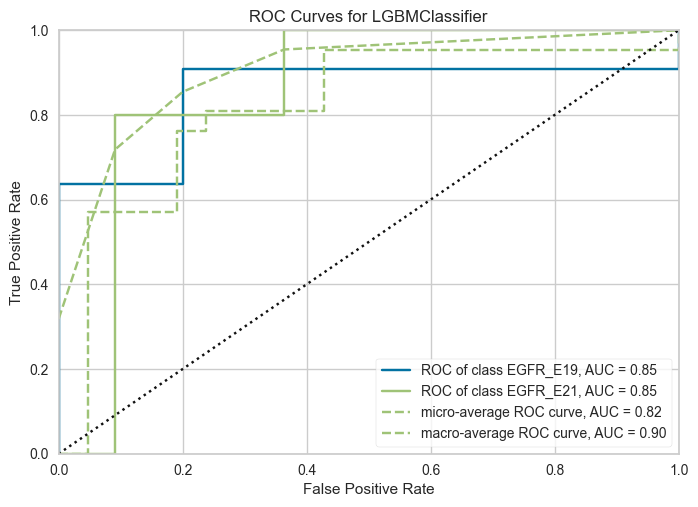

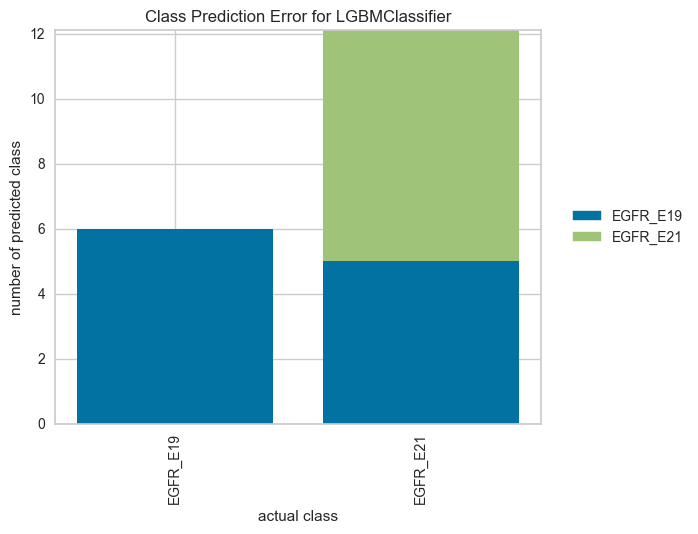

In [90]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.672727
RF: 0.718182
XGBoost: 0.722727
LightGBM: 0.772727
0:	learn: 0.6929186	total: 359us	remaining: 431ms
1:	learn: 0.6928506	total: 740us	remaining: 444ms
2:	learn: 0.6921588	total: 1.03ms	remaining: 410ms
3:	learn: 0.6903003	total: 1.32ms	remaining: 394ms
4:	learn: 0.6902122	total: 1.61ms	remaining: 384ms
5:	learn: 0.6881170	total: 1.89ms	remaining: 376ms
6:	learn: 0.6870616	total: 2.18ms	remaining: 371ms
7:	learn: 0.6863818	total: 2.49ms	remaining: 371ms
8:	learn: 0.6860292	total: 2.79ms	remaining: 369ms
9:	learn: 0.6854537	total: 3.08ms	remaining: 367ms
10:	learn: 0.6845800	total: 3.35ms	remaining: 363ms
11:	learn: 0.6843741	total: 3.63ms	remaining: 359ms
12:	learn: 0.6838314	total: 3.89ms	remaining: 355ms
13:	learn: 0.6828940	total: 4.16ms	remaining: 353ms
14:	learn: 0.6819673	total: 4.43ms	remaining: 350ms
15:	learn: 0.6802257	total: 4.7ms	remaining: 348ms
16:	learn: 0.6792358	t

347:	learn: 0.5352348	total: 101ms	remaining: 247ms
348:	learn: 0.5349123	total: 101ms	remaining: 247ms
349:	learn: 0.5345891	total: 102ms	remaining: 247ms
350:	learn: 0.5344094	total: 102ms	remaining: 246ms
351:	learn: 0.5342415	total: 102ms	remaining: 246ms
352:	learn: 0.5339430	total: 102ms	remaining: 246ms
353:	learn: 0.5336334	total: 103ms	remaining: 245ms
354:	learn: 0.5334058	total: 103ms	remaining: 245ms
355:	learn: 0.5330939	total: 103ms	remaining: 245ms
356:	learn: 0.5327849	total: 104ms	remaining: 245ms
357:	learn: 0.5326969	total: 104ms	remaining: 244ms
358:	learn: 0.5320458	total: 104ms	remaining: 244ms
359:	learn: 0.5318287	total: 105ms	remaining: 244ms
360:	learn: 0.5317606	total: 105ms	remaining: 244ms
361:	learn: 0.5315259	total: 105ms	remaining: 243ms
362:	learn: 0.5311101	total: 105ms	remaining: 243ms
363:	learn: 0.5309380	total: 106ms	remaining: 243ms
364:	learn: 0.5306401	total: 106ms	remaining: 243ms
365:	learn: 0.5303755	total: 106ms	remaining: 242ms
366:	learn: 

859:	learn: 0.3945596	total: 256ms	remaining: 101ms
860:	learn: 0.3943589	total: 256ms	remaining: 101ms
861:	learn: 0.3942150	total: 257ms	remaining: 101ms
862:	learn: 0.3938148	total: 257ms	remaining: 100ms
863:	learn: 0.3936248	total: 257ms	remaining: 100ms
864:	learn: 0.3934770	total: 258ms	remaining: 99.8ms
865:	learn: 0.3932811	total: 258ms	remaining: 99.5ms
866:	learn: 0.3930075	total: 258ms	remaining: 99.2ms
867:	learn: 0.3927388	total: 259ms	remaining: 98.9ms
868:	learn: 0.3925477	total: 259ms	remaining: 98.6ms
869:	learn: 0.3923523	total: 259ms	remaining: 98.3ms
870:	learn: 0.3921415	total: 260ms	remaining: 98ms
871:	learn: 0.3919484	total: 260ms	remaining: 97.7ms
872:	learn: 0.3917442	total: 260ms	remaining: 97.5ms
873:	learn: 0.3915980	total: 261ms	remaining: 97.2ms
874:	learn: 0.3914549	total: 261ms	remaining: 96.9ms
875:	learn: 0.3912097	total: 261ms	remaining: 96.6ms
876:	learn: 0.3910189	total: 262ms	remaining: 96.3ms
877:	learn: 0.3908336	total: 262ms	remaining: 96ms
87

GBDT: 0.677273
[iter 0] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 100] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
NGBoost: 0.627273
DT: 0.554545
AdaBoost: 0.677273

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.649          0.673
1                  RF           0.891          0.718
2             XGBoost           0.915          0.723
3            LightGBM           0.867          0.773
4            CatBoost           0.939          0.677
5                 SVM           0.879          0.723
6                GBDT           1.000          0.677
7             NGBoost           1.000          0.627
8                  DT           0.622          0.555
9            

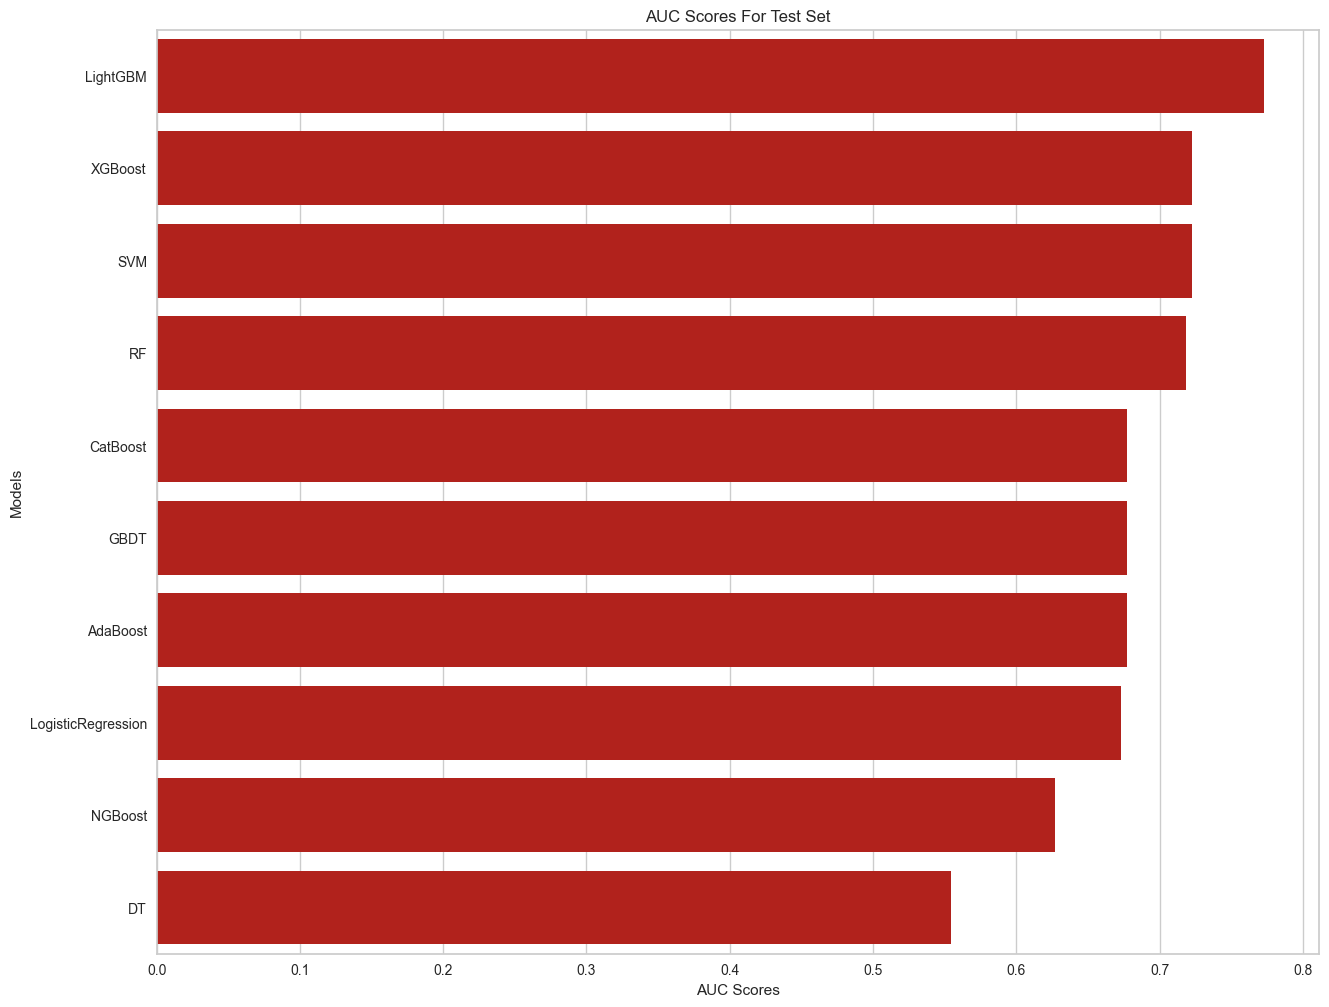

In [91]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
                ('NGBoost', ngb_tuned),
                ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [92]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=lgbm_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6924122	total: 325us	remaining: 390ms
1:	learn: 0.6912732	total: 1.61ms	remaining: 966ms
2:	learn: 0.6900759	total: 1.9ms	remaining: 757ms
3:	learn: 0.6889634	total: 2.18ms	remaining: 651ms
4:	learn: 0.6872022	total: 2.46ms	remaining: 588ms
5:	learn: 0.6861098	total: 2.74ms	remaining: 546ms
6:	learn: 0.6855634	total: 3.01ms	remaining: 513ms
7:	learn: 0.6847845	total: 3.26ms	remaining: 486ms
8:	learn: 0.6839050	total: 3.53ms	remaining: 467ms
9:	learn: 0.6833535	total: 3.79ms	remaining: 451ms
10:	learn: 0.6820539	total: 4.04ms	remaining: 437ms
11:	learn: 0.6804117	total: 4.32ms	remaining: 427ms
12:	learn: 0.6790431	total: 4.58ms	remaining: 418ms
13:	learn: 0.6778570	total: 4.86ms	remaining: 412ms
14:	learn: 0.6761026	total: 5.12ms	remaining: 405ms
15:	learn: 0.6747685	total: 5.39ms	remaining: 399ms
16:	learn: 0.6742180	total: 5.66ms	remaining: 394ms
17:	learn: 0.6726656	total: 5.93ms	remaining: 389ms
18:	learn: 0.6712868	total: 6.19ms	remaining: 385ms
19:	learn: 0.6697120	tot

504:	learn: 0.3705030	total: 143ms	remaining: 197ms
505:	learn: 0.3701112	total: 144ms	remaining: 197ms
506:	learn: 0.3697636	total: 144ms	remaining: 197ms
507:	learn: 0.3694215	total: 144ms	remaining: 197ms
508:	learn: 0.3689333	total: 145ms	remaining: 196ms
509:	learn: 0.3685967	total: 145ms	remaining: 196ms
510:	learn: 0.3682128	total: 145ms	remaining: 196ms
511:	learn: 0.3677667	total: 145ms	remaining: 196ms
512:	learn: 0.3672400	total: 146ms	remaining: 195ms
513:	learn: 0.3667620	total: 146ms	remaining: 195ms
514:	learn: 0.3663434	total: 146ms	remaining: 195ms
515:	learn: 0.3658733	total: 147ms	remaining: 194ms
516:	learn: 0.3653614	total: 147ms	remaining: 194ms
517:	learn: 0.3647527	total: 147ms	remaining: 194ms
518:	learn: 0.3641561	total: 148ms	remaining: 194ms
519:	learn: 0.3636523	total: 148ms	remaining: 193ms
520:	learn: 0.3631983	total: 148ms	remaining: 193ms
521:	learn: 0.3626619	total: 148ms	remaining: 193ms
522:	learn: 0.3621341	total: 149ms	remaining: 193ms
523:	learn: 

1021:	learn: 0.2173268	total: 296ms	remaining: 51.5ms
1022:	learn: 0.2171441	total: 296ms	remaining: 51.3ms
1023:	learn: 0.2170073	total: 297ms	remaining: 51ms
1024:	learn: 0.2167963	total: 297ms	remaining: 50.7ms
1025:	learn: 0.2165761	total: 297ms	remaining: 50.4ms
1026:	learn: 0.2163416	total: 298ms	remaining: 50.1ms
1027:	learn: 0.2161590	total: 298ms	remaining: 49.9ms
1028:	learn: 0.2159530	total: 298ms	remaining: 49.6ms
1029:	learn: 0.2157364	total: 299ms	remaining: 49.3ms
1030:	learn: 0.2155591	total: 299ms	remaining: 49ms
1031:	learn: 0.2153769	total: 299ms	remaining: 48.7ms
1032:	learn: 0.2152428	total: 299ms	remaining: 48.4ms
1033:	learn: 0.2150338	total: 300ms	remaining: 48.1ms
1034:	learn: 0.2148417	total: 300ms	remaining: 47.8ms
1035:	learn: 0.2146603	total: 300ms	remaining: 47.5ms
1036:	learn: 0.2144807	total: 301ms	remaining: 47.3ms
1037:	learn: 0.2142499	total: 301ms	remaining: 47ms
1038:	learn: 0.2139689	total: 301ms	remaining: 46.7ms
1039:	learn: 0.2137759	total: 301m

217:	learn: 0.5155445	total: 66.1ms	remaining: 298ms
218:	learn: 0.5152872	total: 66.5ms	remaining: 298ms
219:	learn: 0.5151543	total: 66.8ms	remaining: 298ms
220:	learn: 0.5147719	total: 67.1ms	remaining: 297ms
221:	learn: 0.5145358	total: 67.4ms	remaining: 297ms
222:	learn: 0.5144331	total: 67.7ms	remaining: 297ms
223:	learn: 0.5138517	total: 68ms	remaining: 296ms
224:	learn: 0.5130403	total: 68.3ms	remaining: 296ms
225:	learn: 0.5128646	total: 68.6ms	remaining: 296ms
226:	learn: 0.5124874	total: 68.9ms	remaining: 295ms
227:	learn: 0.5119424	total: 69.2ms	remaining: 295ms
228:	learn: 0.5116207	total: 69.5ms	remaining: 294ms
229:	learn: 0.5110539	total: 69.7ms	remaining: 294ms
230:	learn: 0.5100488	total: 70ms	remaining: 294ms
231:	learn: 0.5095351	total: 70.3ms	remaining: 293ms
232:	learn: 0.5091568	total: 70.6ms	remaining: 293ms
233:	learn: 0.5089255	total: 70.8ms	remaining: 292ms
234:	learn: 0.5077577	total: 71.2ms	remaining: 292ms
235:	learn: 0.5076690	total: 71.4ms	remaining: 292

739:	learn: 0.3195179	total: 220ms	remaining: 137ms
740:	learn: 0.3193916	total: 220ms	remaining: 136ms
741:	learn: 0.3191115	total: 220ms	remaining: 136ms
742:	learn: 0.3188421	total: 221ms	remaining: 136ms
743:	learn: 0.3185765	total: 221ms	remaining: 135ms
744:	learn: 0.3182178	total: 221ms	remaining: 135ms
745:	learn: 0.3179452	total: 222ms	remaining: 135ms
746:	learn: 0.3178212	total: 222ms	remaining: 135ms
747:	learn: 0.3175601	total: 222ms	remaining: 134ms
748:	learn: 0.3172942	total: 223ms	remaining: 134ms
749:	learn: 0.3170154	total: 223ms	remaining: 134ms
750:	learn: 0.3167418	total: 223ms	remaining: 133ms
751:	learn: 0.3165320	total: 224ms	remaining: 133ms
752:	learn: 0.3161763	total: 224ms	remaining: 133ms
753:	learn: 0.3159198	total: 224ms	remaining: 133ms
754:	learn: 0.3157112	total: 224ms	remaining: 132ms
755:	learn: 0.3154421	total: 225ms	remaining: 132ms
756:	learn: 0.3153196	total: 225ms	remaining: 132ms
757:	learn: 0.3151153	total: 225ms	remaining: 131ms
758:	learn: 

[iter 0] loss=0.6928 val_loss=0.0000 scale=8.0000 norm=16.0000
[iter 100] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0026 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0486 val_loss=0.0000 scale=0.0001 norm=0.0001
0:	learn: 0.6929186	total: 366us	remaining: 439ms
1:	learn: 0.6928506	total: 862us	remaining: 517ms
2:	learn: 0.6921588	total: 1.16ms	remaining: 461ms
3:	learn: 0.6903003	total: 1.45ms	remaining: 435ms
4:	learn: 0.6902122	total: 1.75ms	remaining: 418ms
5:	learn: 0.6881170	total: 2.04ms	remaining: 405ms
6:	learn: 0.6870616	total: 2.34ms	remaining: 400ms
7:	learn

486:	learn: 0.4912509	total: 145ms	remaining: 212ms
487:	learn: 0.4909733	total: 145ms	remaining: 212ms
488:	learn: 0.4906277	total: 145ms	remaining: 212ms
489:	learn: 0.4902917	total: 146ms	remaining: 211ms
490:	learn: 0.4899697	total: 146ms	remaining: 211ms
491:	learn: 0.4896541	total: 147ms	remaining: 211ms
492:	learn: 0.4893245	total: 147ms	remaining: 211ms
493:	learn: 0.4890549	total: 147ms	remaining: 210ms
494:	learn: 0.4887130	total: 148ms	remaining: 210ms
495:	learn: 0.4884955	total: 148ms	remaining: 210ms
496:	learn: 0.4882371	total: 148ms	remaining: 210ms
497:	learn: 0.4879165	total: 148ms	remaining: 209ms
498:	learn: 0.4875984	total: 149ms	remaining: 209ms
499:	learn: 0.4873836	total: 149ms	remaining: 209ms
500:	learn: 0.4871169	total: 149ms	remaining: 208ms
501:	learn: 0.4868864	total: 150ms	remaining: 208ms
502:	learn: 0.4865965	total: 150ms	remaining: 208ms
503:	learn: 0.4862113	total: 150ms	remaining: 208ms
504:	learn: 0.4859110	total: 151ms	remaining: 207ms
505:	learn: 

994:	learn: 0.3690032	total: 299ms	remaining: 61.7ms
995:	learn: 0.3688346	total: 300ms	remaining: 61.4ms
996:	learn: 0.3686479	total: 300ms	remaining: 61.1ms
997:	learn: 0.3684650	total: 300ms	remaining: 60.8ms
998:	learn: 0.3683057	total: 301ms	remaining: 60.5ms
999:	learn: 0.3681329	total: 301ms	remaining: 60.2ms
1000:	learn: 0.3679696	total: 301ms	remaining: 59.9ms
1001:	learn: 0.3677854	total: 302ms	remaining: 59.6ms
1002:	learn: 0.3676201	total: 302ms	remaining: 59.3ms
1003:	learn: 0.3674529	total: 302ms	remaining: 59ms
1004:	learn: 0.3673278	total: 303ms	remaining: 58.8ms
1005:	learn: 0.3671588	total: 303ms	remaining: 58.4ms
1006:	learn: 0.3669729	total: 303ms	remaining: 58.2ms
1007:	learn: 0.3666882	total: 304ms	remaining: 57.9ms
1008:	learn: 0.3665650	total: 304ms	remaining: 57.6ms
1009:	learn: 0.3663273	total: 305ms	remaining: 57.3ms
1010:	learn: 0.3661613	total: 305ms	remaining: 57ms
1011:	learn: 0.3659906	total: 305ms	remaining: 56.7ms
1012:	learn: 0.3658300	total: 306ms	re

[iter 100] loss=0.1217 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.1217 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.1218 val_loss=0.0000 scale=0.0001 norm=0.0001
################ Accuracy scores for test set for the models: ################

0:	learn: 0.6914439	total: 352us	remaining: 422ms
1:	learn: 0.6900633	total: 821us	remaining: 492ms
2:	learn: 0.6895591	total: 1.08ms	remaining: 433ms
3:	learn: 0.6882855	total: 1.36ms	remaining: 406ms
4:	learn: 0.6865036	total: 1.64ms	remaining: 391ms
5:	learn: 0.6863677	total: 1.93ms	remaining: 383ms
6:	learn: 0.6851931	total: 2.21ms	remaining: 376ms
7:	learn: 0.6837461	total: 2.46ms	remaining: 367ms
8:	learn: 0.6827172	total: 2.72ms	remaining: 360ms
9:	learn: 0.6819499	total: 2.98ms	remaining: 355ms
10:	learn: 0.6813806	total: 3.26ms	remaining: 352ms
11:	learn: 0.6805131	total: 3.51ms	remaining: 347ms
12:	learn: 0.6797048	total: 3.77ms	remaining: 344ms


526:	learn: 0.3788187	total: 152ms	remaining: 194ms
527:	learn: 0.3784556	total: 152ms	remaining: 194ms
528:	learn: 0.3778938	total: 153ms	remaining: 194ms
529:	learn: 0.3774946	total: 153ms	remaining: 193ms
530:	learn: 0.3771369	total: 153ms	remaining: 193ms
531:	learn: 0.3768169	total: 154ms	remaining: 193ms
532:	learn: 0.3764798	total: 154ms	remaining: 193ms
533:	learn: 0.3761831	total: 154ms	remaining: 192ms
534:	learn: 0.3756361	total: 155ms	remaining: 192ms
535:	learn: 0.3750991	total: 155ms	remaining: 192ms
536:	learn: 0.3748542	total: 155ms	remaining: 192ms
537:	learn: 0.3745239	total: 155ms	remaining: 191ms
538:	learn: 0.3742103	total: 156ms	remaining: 191ms
539:	learn: 0.3738209	total: 156ms	remaining: 191ms
540:	learn: 0.3736424	total: 156ms	remaining: 190ms
541:	learn: 0.3733467	total: 157ms	remaining: 190ms
542:	learn: 0.3731711	total: 157ms	remaining: 190ms
543:	learn: 0.3728662	total: 157ms	remaining: 189ms
544:	learn: 0.3725654	total: 157ms	remaining: 189ms
545:	learn: 

1029:	learn: 0.2603961	total: 306ms	remaining: 50.5ms
1030:	learn: 0.2603061	total: 306ms	remaining: 50.2ms
1031:	learn: 0.2600021	total: 307ms	remaining: 49.9ms
1032:	learn: 0.2598566	total: 307ms	remaining: 49.6ms
1033:	learn: 0.2597660	total: 308ms	remaining: 49.4ms
1034:	learn: 0.2595626	total: 308ms	remaining: 49.1ms
1035:	learn: 0.2593668	total: 308ms	remaining: 48.8ms
1036:	learn: 0.2592773	total: 308ms	remaining: 48.5ms
1037:	learn: 0.2590484	total: 309ms	remaining: 48.2ms
1038:	learn: 0.2588716	total: 309ms	remaining: 47.9ms
1039:	learn: 0.2587289	total: 309ms	remaining: 47.6ms
1040:	learn: 0.2586375	total: 310ms	remaining: 47.3ms
1041:	learn: 0.2585489	total: 310ms	remaining: 47ms
1042:	learn: 0.2584577	total: 310ms	remaining: 46.7ms
1043:	learn: 0.2582575	total: 311ms	remaining: 46.4ms
1044:	learn: 0.2579314	total: 311ms	remaining: 46.1ms
1045:	learn: 0.2578420	total: 311ms	remaining: 45.8ms
1046:	learn: 0.2576990	total: 311ms	remaining: 45.5ms
1047:	learn: 0.2575246	total: 

198:	learn: 0.5728950	total: 60.5ms	remaining: 304ms
199:	learn: 0.5724140	total: 60.9ms	remaining: 305ms
200:	learn: 0.5717294	total: 61.2ms	remaining: 304ms
201:	learn: 0.5713527	total: 61.5ms	remaining: 304ms
202:	learn: 0.5709616	total: 61.8ms	remaining: 304ms
203:	learn: 0.5708143	total: 62.2ms	remaining: 304ms
204:	learn: 0.5698836	total: 62.5ms	remaining: 303ms
205:	learn: 0.5694849	total: 62.8ms	remaining: 303ms
206:	learn: 0.5690140	total: 63.1ms	remaining: 303ms
207:	learn: 0.5687560	total: 63.4ms	remaining: 302ms
208:	learn: 0.5679075	total: 63.7ms	remaining: 302ms
209:	learn: 0.5670762	total: 64ms	remaining: 302ms
210:	learn: 0.5666179	total: 64.2ms	remaining: 301ms
211:	learn: 0.5655597	total: 64.6ms	remaining: 301ms
212:	learn: 0.5651678	total: 64.9ms	remaining: 301ms
213:	learn: 0.5643451	total: 65.2ms	remaining: 301ms
214:	learn: 0.5633107	total: 65.5ms	remaining: 300ms
215:	learn: 0.5628647	total: 65.8ms	remaining: 300ms
216:	learn: 0.5622047	total: 66.1ms	remaining: 3

712:	learn: 0.3614659	total: 214ms	remaining: 146ms
713:	learn: 0.3611765	total: 214ms	remaining: 146ms
714:	learn: 0.3608673	total: 215ms	remaining: 146ms
715:	learn: 0.3605604	total: 215ms	remaining: 145ms
716:	learn: 0.3602045	total: 215ms	remaining: 145ms
717:	learn: 0.3599392	total: 216ms	remaining: 145ms
718:	learn: 0.3596374	total: 216ms	remaining: 144ms
719:	learn: 0.3593035	total: 216ms	remaining: 144ms
720:	learn: 0.3590180	total: 217ms	remaining: 144ms
721:	learn: 0.3587164	total: 217ms	remaining: 144ms
722:	learn: 0.3584823	total: 217ms	remaining: 143ms
723:	learn: 0.3581814	total: 217ms	remaining: 143ms
724:	learn: 0.3578882	total: 218ms	remaining: 143ms
725:	learn: 0.3576595	total: 218ms	remaining: 142ms
726:	learn: 0.3573625	total: 218ms	remaining: 142ms
727:	learn: 0.3570686	total: 219ms	remaining: 142ms
728:	learn: 0.3567744	total: 219ms	remaining: 142ms
729:	learn: 0.3565486	total: 219ms	remaining: 141ms
730:	learn: 0.3562579	total: 220ms	remaining: 141ms
731:	learn: 

[iter 0] loss=0.6928 val_loss=0.0000 scale=4.0000 norm=8.0000


LinAlgError: Singular matrix

In [111]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [113]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

0.6190476190476191

In [114]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM221-stack73', Save_format = 'csv',Save_type = 'col')

In [93]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2//RFE-RF-GB/SVM221")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [94]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [100]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/group2/new-auc/testZscore-SVM22.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [101]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-1921-g2"

In [102]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.89      0.47      0.62        17
    EGFR_E21       0.55      0.92      0.69        12

    accuracy                           0.66        29
   macro avg       0.72      0.69      0.65        29
weighted avg       0.75      0.66      0.65        29

precision 0.55 accuracy 0.6551724137931034 recall 0.9166666666666666 auc 0.6936274509803921


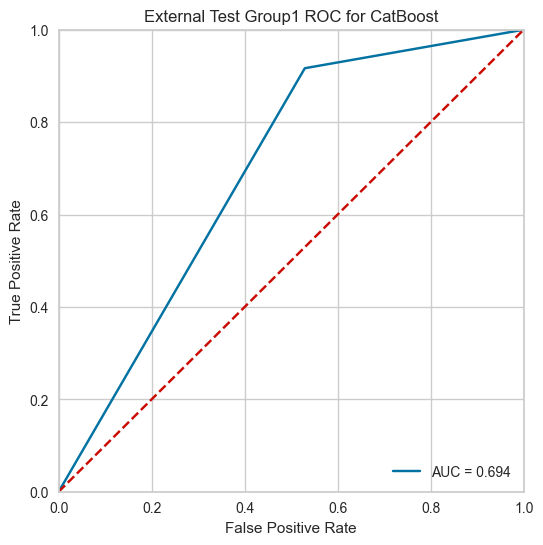

In [103]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [104]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8  9]
 [ 1 11]]
Normalized confusion matrix
[[0.47 0.53]
 [0.08 0.92]]


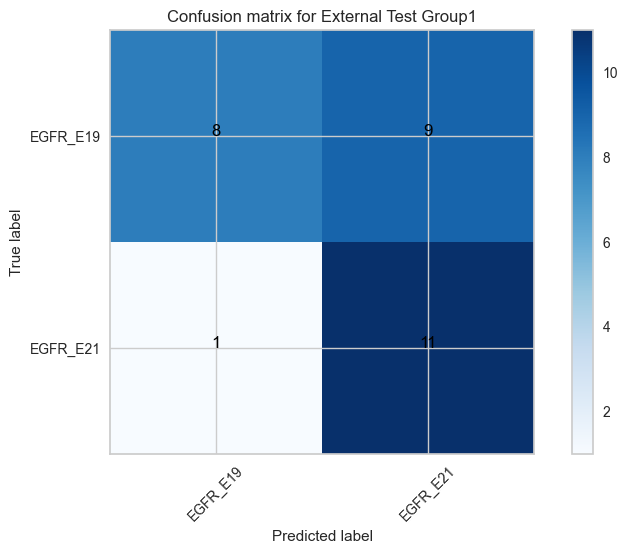

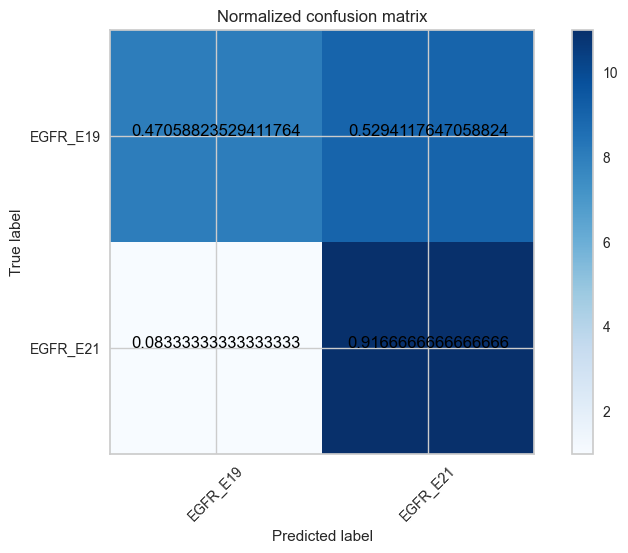

In [105]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [106]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.70      0.41      0.52        17
    EGFR_E21       0.47      0.75      0.58        12

    accuracy                           0.55        29
   macro avg       0.59      0.58      0.55        29
weighted avg       0.61      0.55      0.54        29

precision 0.47368421052631576 accuracy 0.5517241379310345 recall 0.75 auc 0.5808823529411764


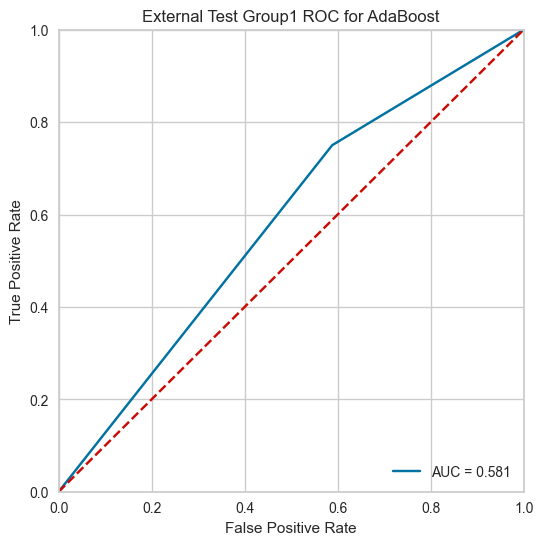

In [107]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [108]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 10]
 [ 3  9]]
Normalized confusion matrix
[[0.41 0.59]
 [0.25 0.75]]


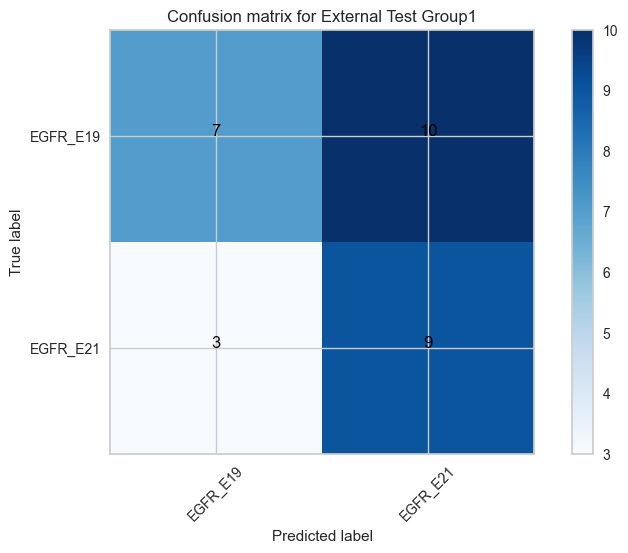

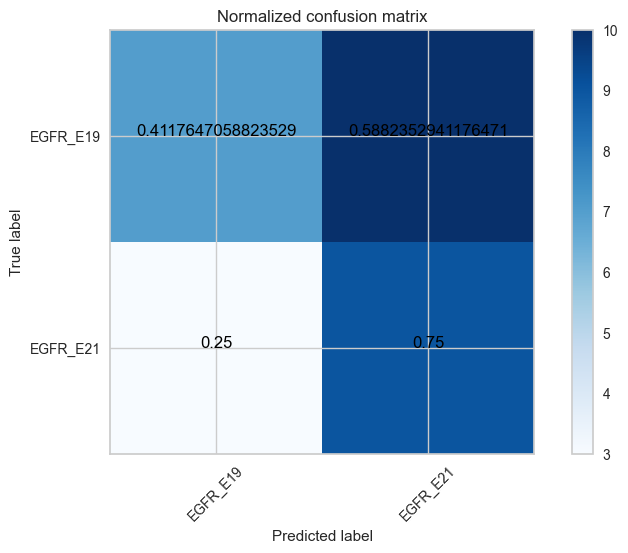

In [109]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [110]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR_E19       0.82      0.53      0.64        17
    EGFR_E21       0.56      0.83      0.67        12

    accuracy                           0.66        29
   macro avg       0.69      0.68      0.65        29
weighted avg       0.71      0.66      0.65        29

precision 0.6868686868686869 accuracy 0.6551724137931034 recall 0.6813725490196079 auc 0.6813725490196079


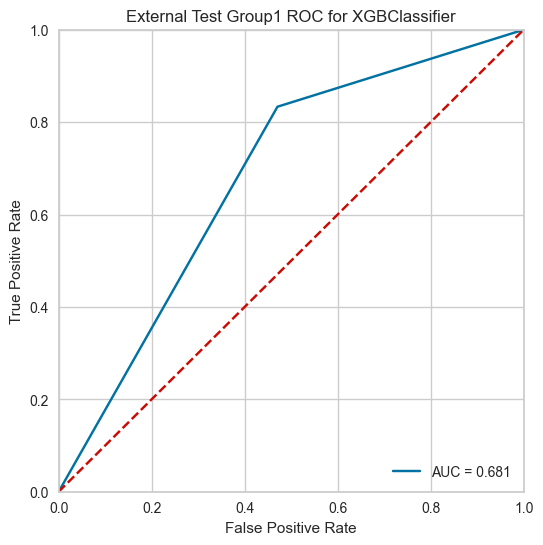

In [111]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [112]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9  8]
 [ 2 10]]
Normalized confusion matrix
[[0.53 0.47]
 [0.17 0.83]]


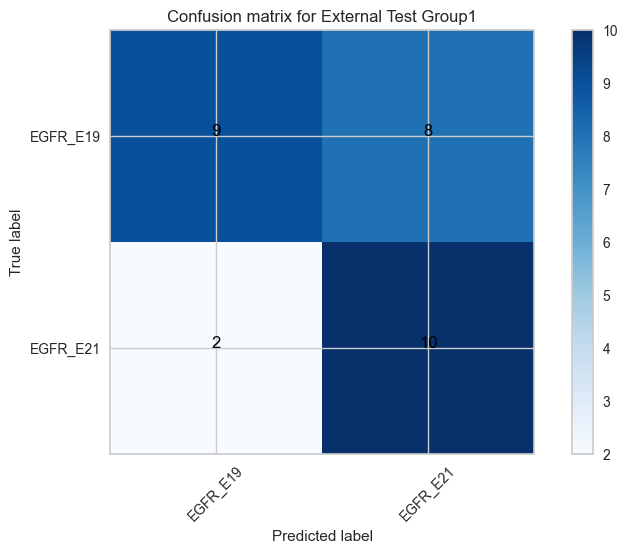

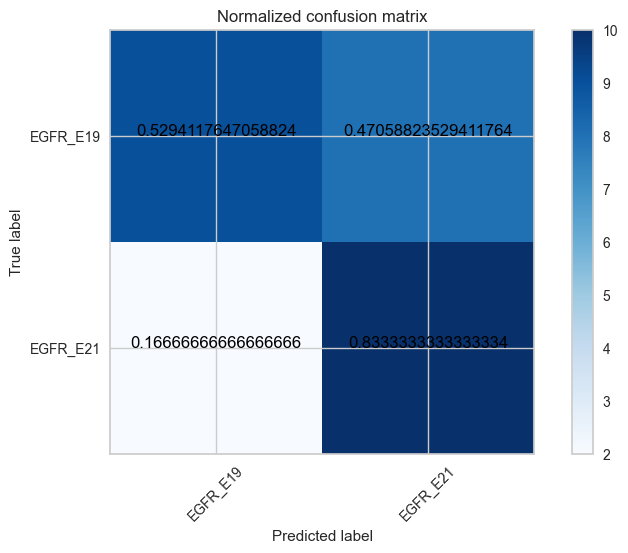

In [113]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [114]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.70      0.41      0.52        17
    EGFR_E21       0.47      0.75      0.58        12

    accuracy                           0.55        29
   macro avg       0.59      0.58      0.55        29
weighted avg       0.61      0.55      0.54        29

precision 0.47368421052631576 accuracy 0.5517241379310345 recall 0.75 auc 0.5808823529411764


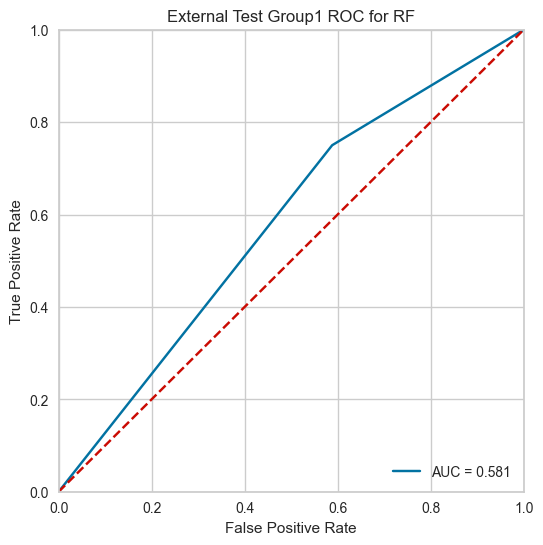

In [115]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 7 10]
 [ 3  9]]
Normalized confusion matrix
[[0.41 0.59]
 [0.25 0.75]]


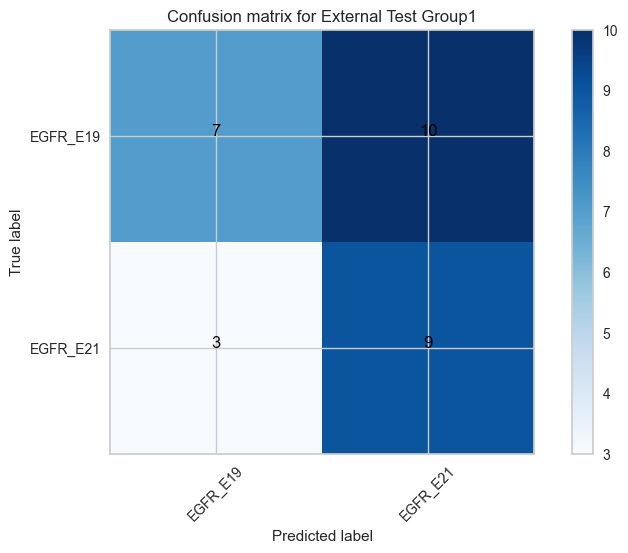

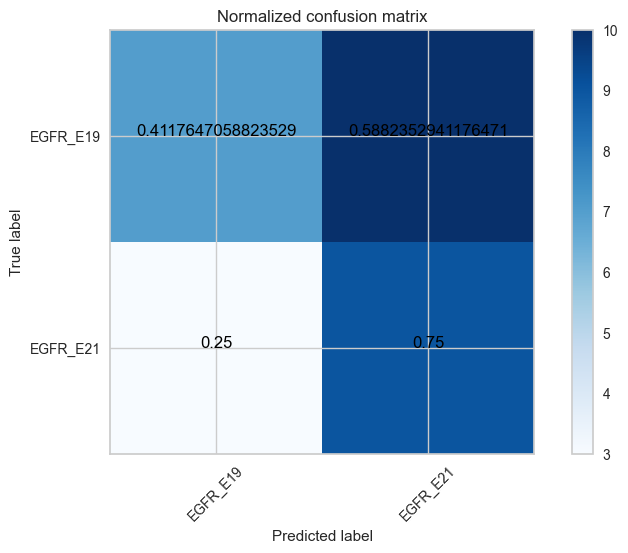

In [116]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [117]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR_E19       0.60      0.53      0.56        17
    EGFR_E21       0.43      0.50      0.46        12

    accuracy                           0.52        29
   macro avg       0.51      0.51      0.51        29
weighted avg       0.53      0.52      0.52        29

precision 0.42857142857142855 accuracy 0.5172413793103449 recall 0.5 auc 0.5147058823529412


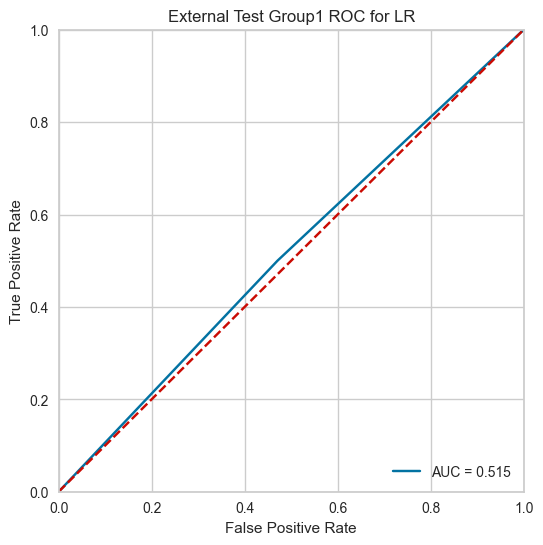

In [118]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[9 8]
 [6 6]]
Normalized confusion matrix
[[0.53 0.47]
 [0.5  0.5 ]]


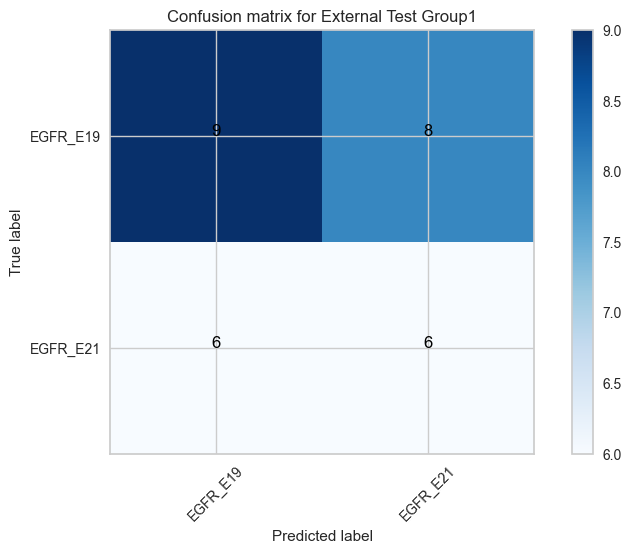

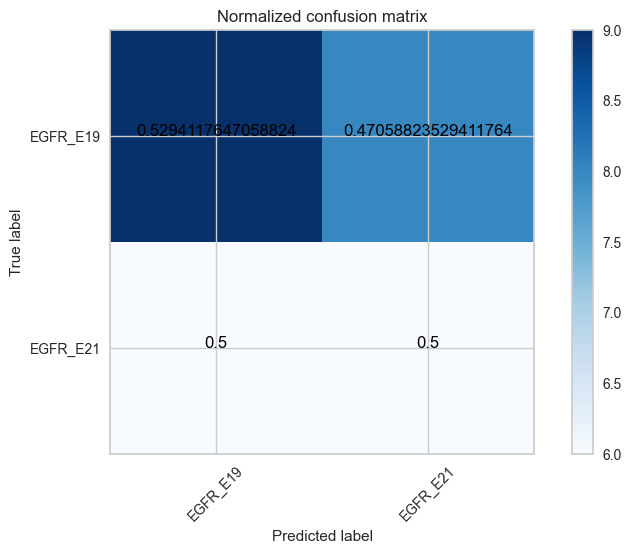

In [119]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [120]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.67      0.94      0.78        17
    EGFR_E21       0.80      0.33      0.47        12

    accuracy                           0.69        29
   macro avg       0.73      0.64      0.63        29
weighted avg       0.72      0.69      0.65        29

precision 0.8 accuracy 0.6896551724137931 recall 0.3333333333333333 auc 0.6372549019607843


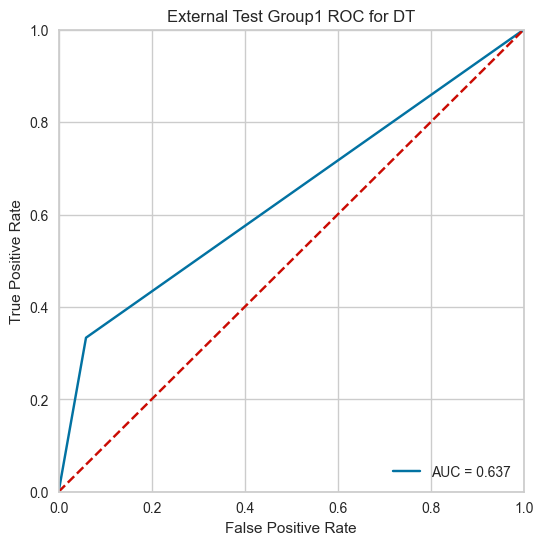

In [121]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[16  1]
 [ 8  4]]
Normalized confusion matrix
[[0.94 0.06]
 [0.67 0.33]]


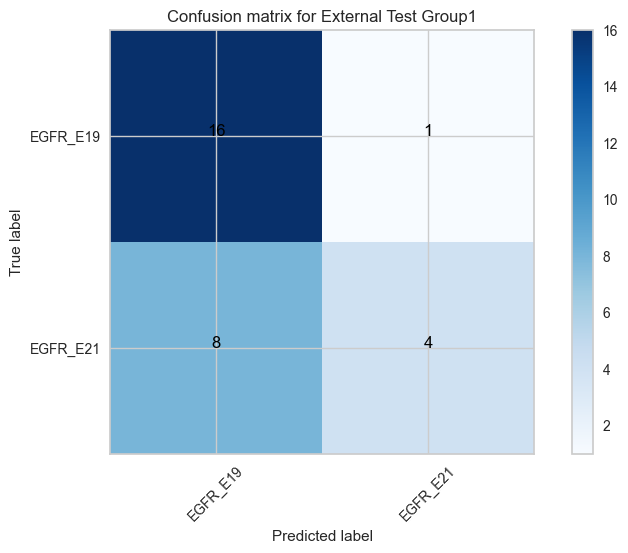

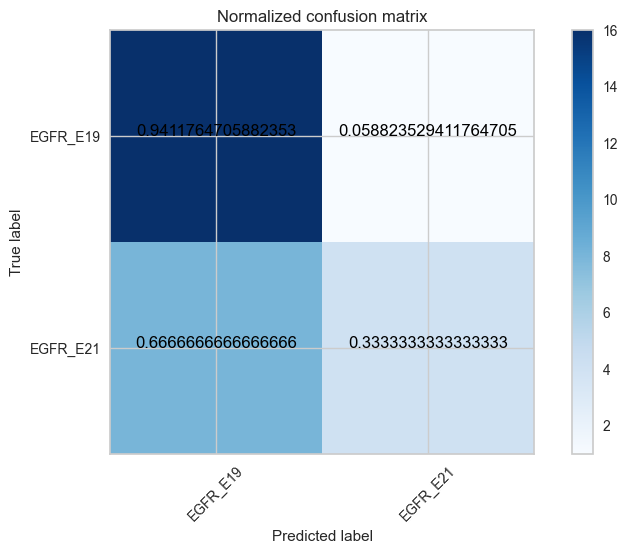

In [122]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.75      0.53      0.62        17
    EGFR_E21       0.53      0.75      0.62        12

    accuracy                           0.62        29
   macro avg       0.64      0.64      0.62        29
weighted avg       0.66      0.62      0.62        29

precision 0.5294117647058824 accuracy 0.6206896551724138 recall 0.75 auc 0.6397058823529411


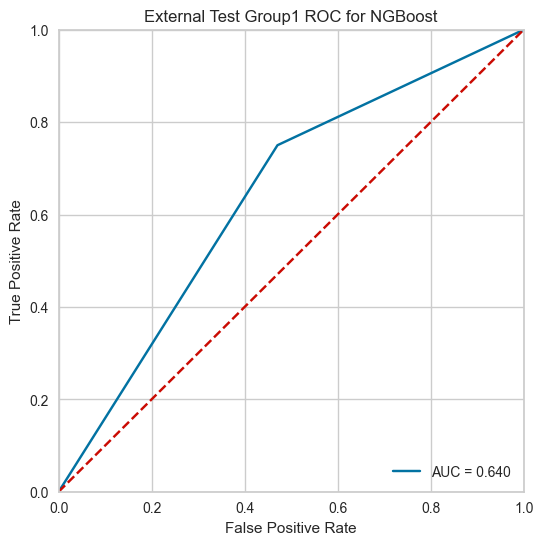

In [124]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[9 8]
 [3 9]]
Normalized confusion matrix
[[0.53 0.47]
 [0.25 0.75]]


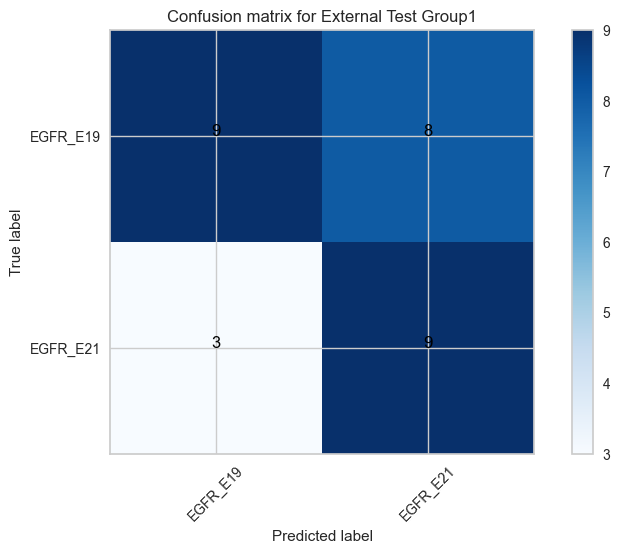

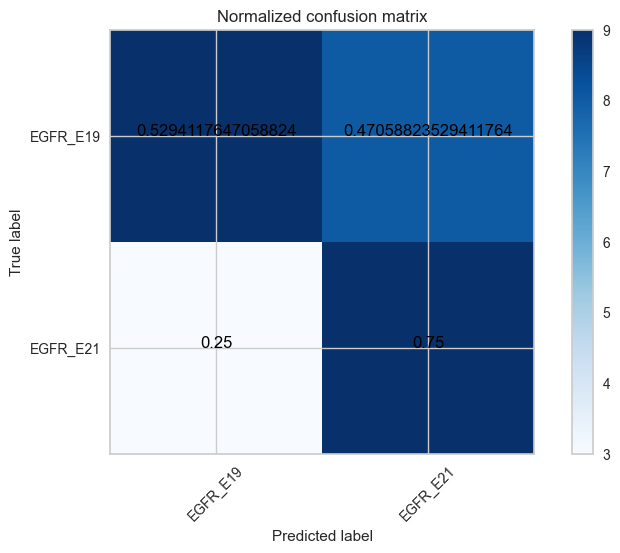

In [125]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [126]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.73      0.47      0.57        17
    EGFR_E21       0.50      0.75      0.60        12

    accuracy                           0.59        29
   macro avg       0.61      0.61      0.59        29
weighted avg       0.63      0.59      0.58        29

precision 0.5 accuracy 0.5862068965517241 recall 0.75 auc 0.6102941176470589


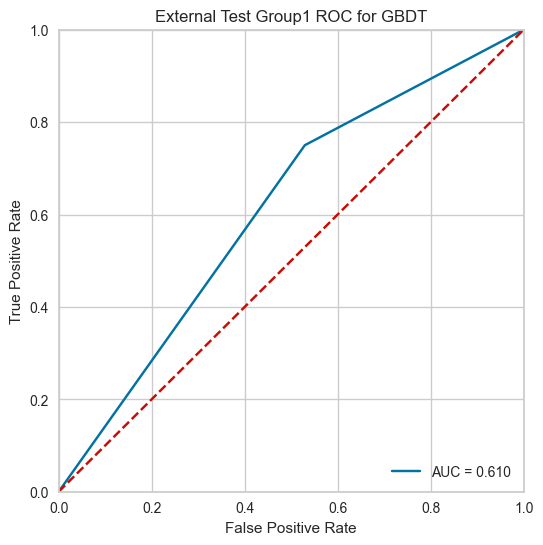

In [127]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[8 9]
 [3 9]]
Normalized confusion matrix
[[0.47 0.53]
 [0.25 0.75]]


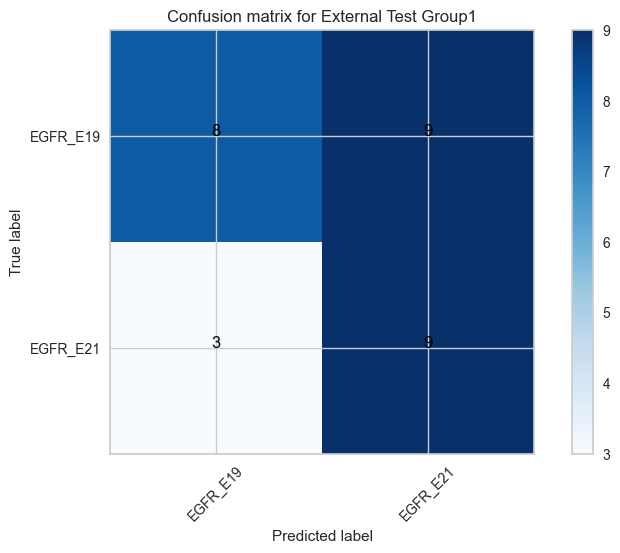

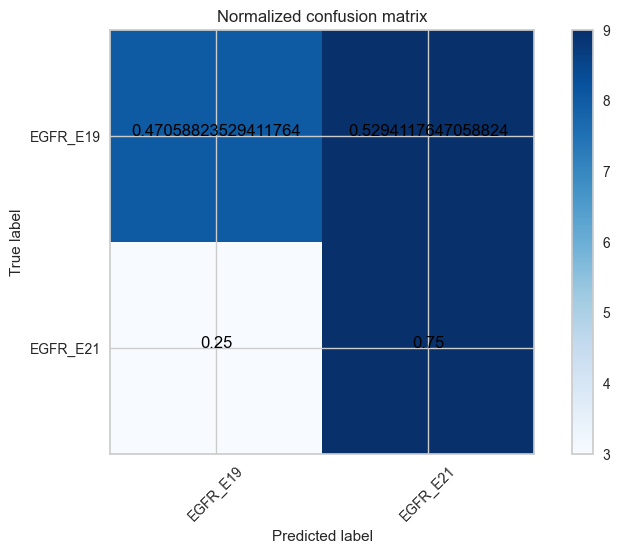

In [128]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [129]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.40      0.35      0.38        17
    EGFR_E21       0.21      0.25      0.23        12

    accuracy                           0.31        29
   macro avg       0.31      0.30      0.30        29
weighted avg       0.32      0.31      0.32        29

precision 0.21428571428571427 accuracy 0.3103448275862069 recall 0.25 auc 0.6102941176470589


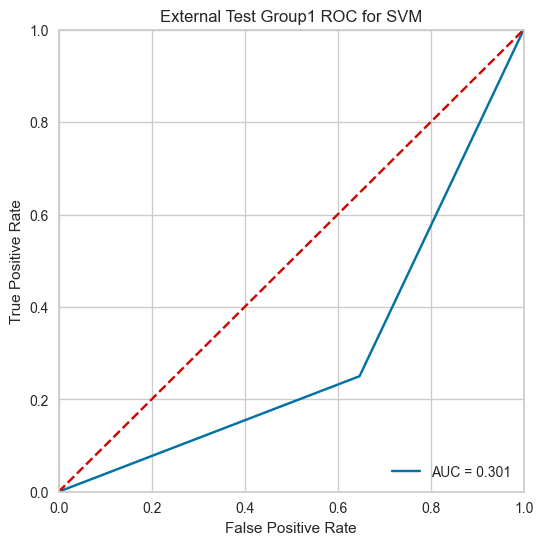

In [130]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 6 11]
 [ 9  3]]
Normalized confusion matrix
[[0.35 0.65]
 [0.75 0.25]]


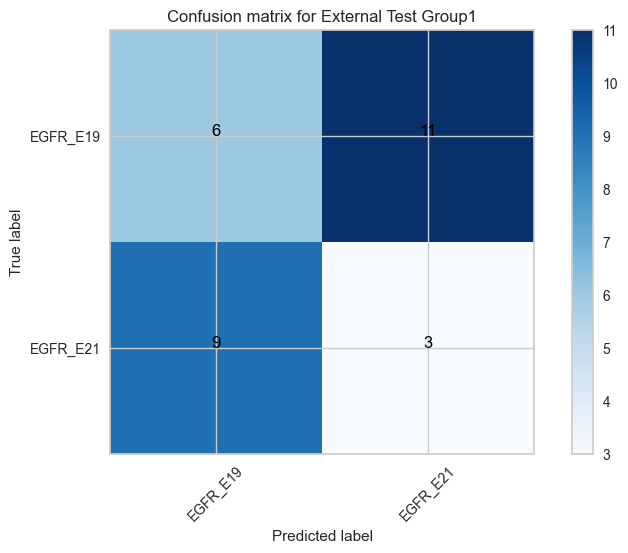

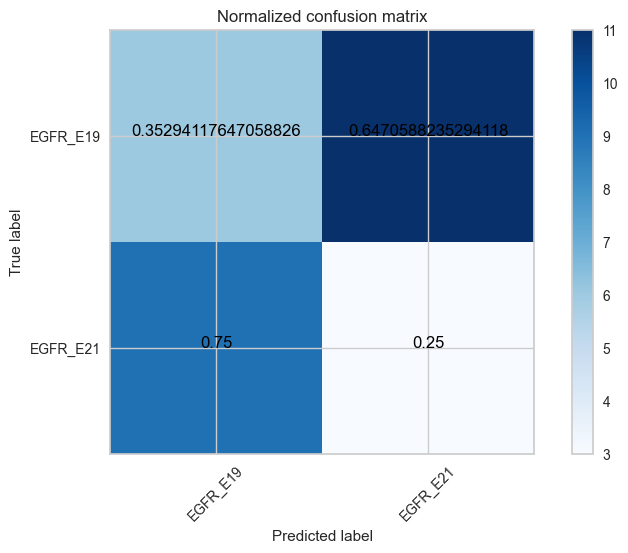

In [131]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [132]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM221/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-SVM221-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR_E19       0.80      0.47      0.59        17
    EGFR_E21       0.53      0.83      0.65        12

    accuracy                           0.62        29
   macro avg       0.66      0.65      0.62        29
weighted avg       0.69      0.62      0.61        29

precision 0.5263157894736842 accuracy 0.6206896551724138 recall 0.8333333333333334 auc 0.6519607843137255


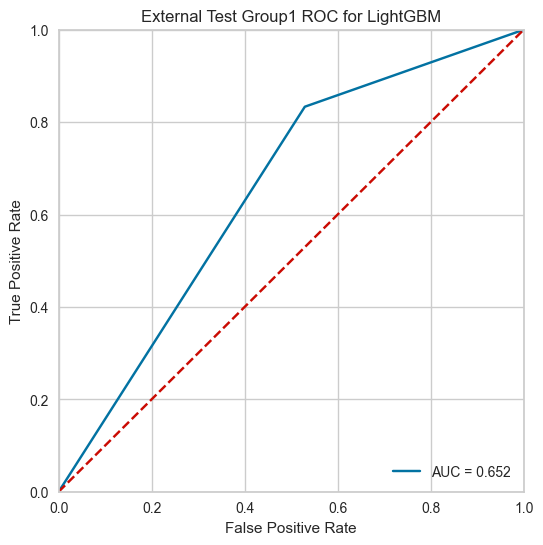

In [133]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 8  9]
 [ 2 10]]
Normalized confusion matrix
[[0.47 0.53]
 [0.17 0.83]]


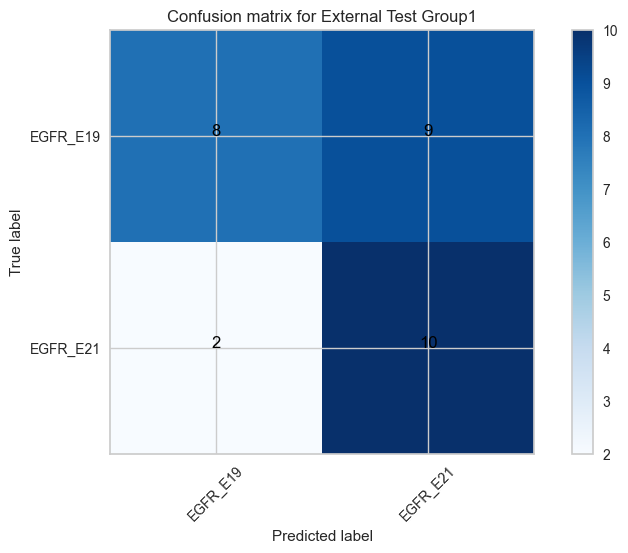

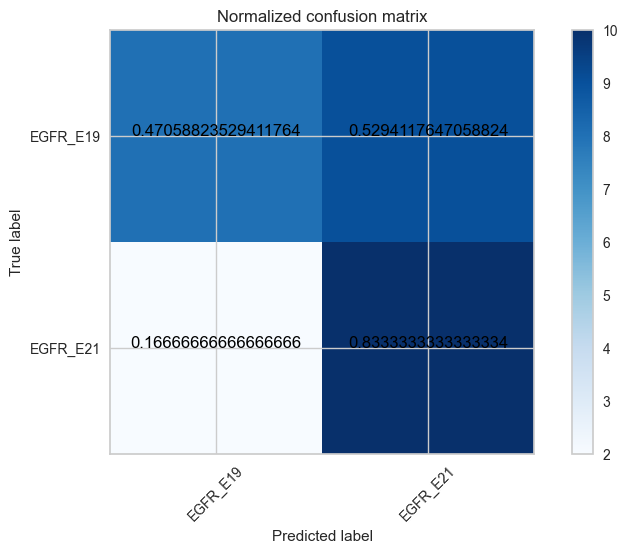

In [134]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()